
### <u><i><FONT COLOR="BLUE"> Problem Statement - Part I</i></u>
 
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

<u><FONT COLOR="BLUE">The company wants to know:</u>

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

<u> <FONT COLOR="BLUE">Business Goal </u>

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### <FONT COLOR="BLUE">Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)

### <FONT COLOR="BLUE">Reading Data

In [3]:
housing_data = pd.read_csv('train.csv')
housing_data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [4]:
housing_data.shape

(1460, 81)

In [5]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
housing_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


<FONT COLOR="BLUE">Making copy of original dataframe

In [7]:
house_df = housing_data.copy()

<FONT COLOR="BLUE">Checking for null values

In [8]:
null_cols = house_df.columns[house_df.isnull().sum() != 0]

house_df[null_cols].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### <FONT COLOR="BLUE">Data Cleaning
    
- <font color = "blue"> Handling Missing Values

### <font color = 'blue'> Dropping columns with null values > 45%

In [9]:
#percentage check for null values

null_percentage = round((house_df[null_cols].isnull().sum()/len(house_df)*100),2)

null_percentage.sort_values(ascending=False)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

In [10]:
# Dropping columns with null_percentage > 45%
cols_to_drop = null_percentage[null_percentage>45].keys()
print(cols_to_drop)

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [11]:
house_df_dropNA = house_df.drop(columns=cols_to_drop, axis=1)

In [12]:
# Removing ID colum as it will not have any significance in analysis

In [13]:
house_df_dropID = house_df_dropNA.drop(columns='Id',axis=1)

In [14]:
house_df_dropID.shape

(1460, 75)

In [15]:
house_df_dropID.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [16]:
null_cols = house_df_dropID.columns[house_df_dropID.isnull().sum() != 0]

null_percentage = round((house_df_dropID[null_cols].isnull().sum()/len(house_df_dropID)*100),2)

null_percentage.sort_values(ascending=False)


LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
dtype: float64

In [17]:
house_df_dropID[null_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrType    1452 non-null   object 
 2   MasVnrArea    1452 non-null   float64
 3   BsmtQual      1423 non-null   object 
 4   BsmtCond      1423 non-null   object 
 5   BsmtExposure  1422 non-null   object 
 6   BsmtFinType1  1423 non-null   object 
 7   BsmtFinType2  1422 non-null   object 
 8   Electrical    1459 non-null   object 
 9   GarageType    1379 non-null   object 
 10  GarageYrBlt   1379 non-null   float64
 11  GarageFinish  1379 non-null   object 
 12  GarageQual    1379 non-null   object 
 13  GarageCond    1379 non-null   object 
dtypes: float64(3), object(11)
memory usage: 159.8+ KB


### <font color = 'Blue'>Data imputation for numerical columns

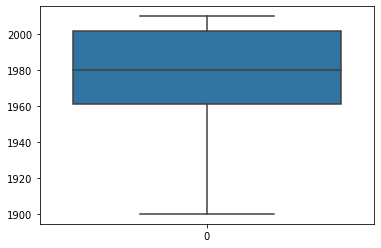

In [18]:
#GarageYrBlt

sns.boxplot(house_df_dropID['GarageYrBlt'])
plt.show()

In [19]:
#There are no outliers, hence handling the missing values by replacing by mean

house_df_dropID['GarageYrBlt'].fillna(house_df_dropID['GarageYrBlt'].mean(),inplace=True)

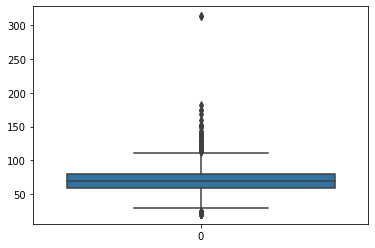

In [20]:
#LotFrontage

sns.boxplot(house_df_dropID['LotFrontage'])
plt.show()

In [21]:
# As there are outliers, filling the missing values by median

house_df_dropID['LotFrontage'].fillna(house_df_dropID['LotFrontage'].median(),inplace=True)

### <font color = 'Blue'>Data imputation for categorical columns

In [22]:
house_df_dropID['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

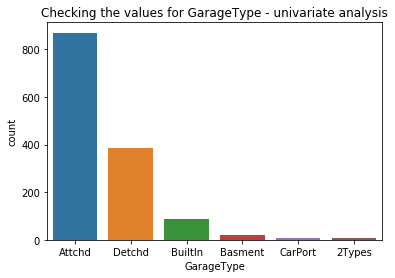

In [23]:
#GarageType
sns.countplot(data=house_df_dropID, x='GarageType',order = house_df_dropID['GarageType'].value_counts().index)
plt.title("Checking the values for GarageType - univariate analysis")
plt.show()

In [24]:
#Most of the values are "Attchd" - so we can map the null values to "Attchd" -- Mode
house_df_dropID['GarageType'] = house_df_dropID['GarageType'].fillna("Attchd")

In [25]:
house_df_dropID['GarageType'].value_counts(dropna=False)

Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [26]:
#GarageFinish
house_df_dropID['GarageFinish'].value_counts(dropna=False)

Unf    605
RFn    422
Fin    352
NaN     81
Name: GarageFinish, dtype: int64

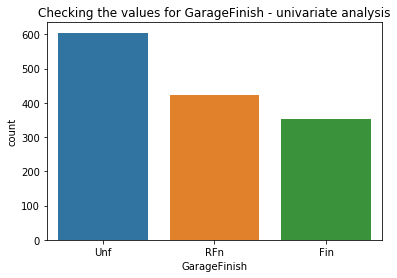

In [27]:
#GarageFinish
sns.countplot(data=house_df_dropID, x='GarageFinish',order = house_df_dropID['GarageFinish'].value_counts().index)
plt.title("Checking the values for GarageFinish - univariate analysis")
plt.show()

In [28]:
#As all the values are almost evenly distributed, hence not filling the value with "mode", but will create a new category as "unknown"
house_df_dropID['GarageFinish'] = house_df_dropID['GarageFinish'].fillna("Unknown")

In [29]:
house_df_dropID['GarageFinish'].value_counts(dropna=False)

Unf        605
RFn        422
Fin        352
Unknown     81
Name: GarageFinish, dtype: int64

In [30]:
#GarageQual
house_df_dropID['GarageQual'].value_counts(dropna=False)

TA     1311
NaN      81
Fa       48
Gd       14
Ex        3
Po        3
Name: GarageQual, dtype: int64

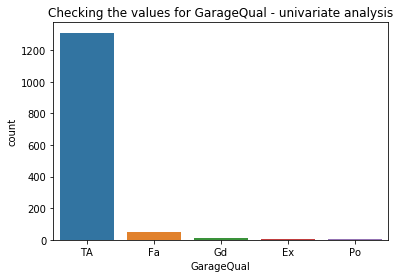

In [31]:
#GarageQual
sns.countplot(data=house_df_dropID, x='GarageQual',order = house_df_dropID['GarageQual'].value_counts().index)
plt.title("Checking the values for GarageQual - univariate analysis")
plt.show()

In [32]:
#Most of the values are "TA" - so we can map the null values to "TA" -- Mode
house_df_dropID['GarageQual'] = house_df_dropID['GarageQual'].fillna("TA")

In [33]:
house_df_dropID['GarageQual'].value_counts(dropna=False)

TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [34]:
#GarageCond
house_df_dropID['GarageCond'].value_counts(dropna=False)

TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64

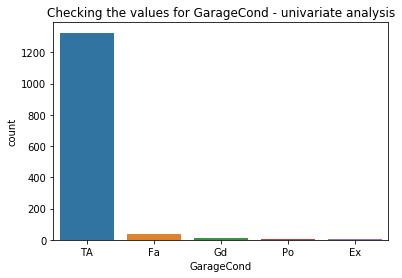

In [35]:
#GarageCond
sns.countplot(data=house_df_dropID, x='GarageCond',order = house_df_dropID['GarageCond'].value_counts().index)
plt.title("Checking the values for GarageCond - univariate analysis")
plt.show()

In [36]:
#Most of the values are "TA" - so we can map the null values to "TA" -- Mode
house_df_dropID['GarageCond'] = house_df_dropID['GarageCond'].fillna("TA")

In [37]:
house_df_dropID['GarageCond'].value_counts(dropna=False)

TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [38]:
# Checking for remaining null values percentage
null_cols = house_df_dropID.columns[house_df_dropID.isnull().sum() != 0]

null_percentage = round((house_df_dropID[null_cols].isnull().sum()/len(house_df_dropID)*100),2)

null_percentage.sort_values(ascending=False)

BsmtExposure    2.60
BsmtFinType2    2.60
BsmtQual        2.53
BsmtCond        2.53
BsmtFinType1    2.53
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
dtype: float64

In [39]:
#As the remaining null values are less then 3%, we will drop these null values
house_df_cleaned = house_df_dropID.dropna()
house_df_cleaned.shape

(1412, 75)

In [40]:
# Final Check for null values percentage
null_cols = house_df_cleaned.columns[house_df_cleaned.isnull().sum() != 0]

null_percentage = round((house_df_cleaned[null_cols].isnull().sum()/len(house_df_cleaned)*100),2)

null_percentage.sort_values(ascending=False)

Series([], dtype: float64)

In [41]:
house_df_cleaned.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


### <font color = 'blue'>Data Preparation

In [42]:
#converting the column "MSSubClass","OverallQual","OverallCond" as categorical as it is a categorical col and not a numerical
house_df_cleaned['MSSubClass'] = house_df_cleaned['MSSubClass'].astype('object')
house_df_cleaned['OverallQual'] = house_df_cleaned['OverallQual'].astype('object')
house_df_cleaned['OverallCond'] = house_df_cleaned['OverallCond'].astype('object')

In [43]:
categorical_cols = house_df_cleaned.select_dtypes(include='object').columns

In [44]:
numerical_cols = house_df_cleaned.select_dtypes(include='number').columns

In [45]:
categorical_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [46]:
numerical_cols

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

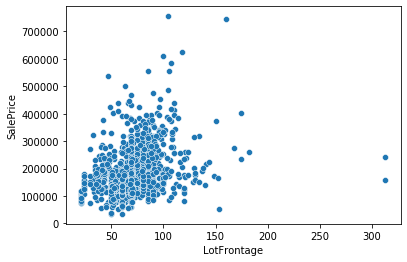

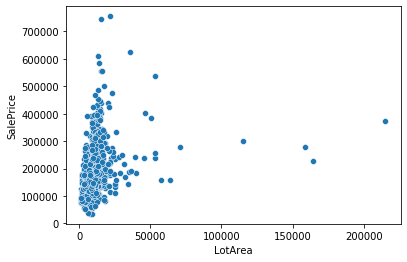

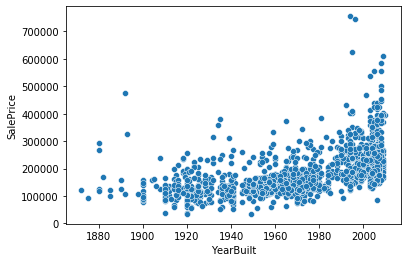

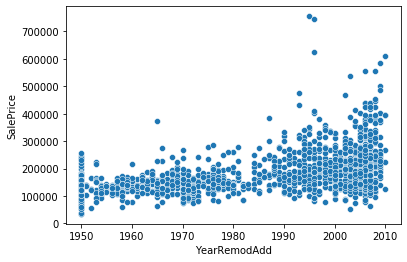

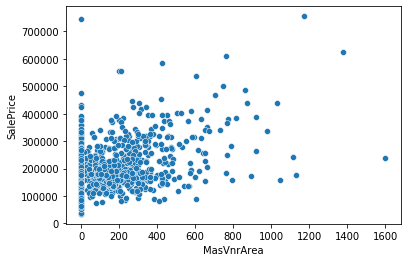

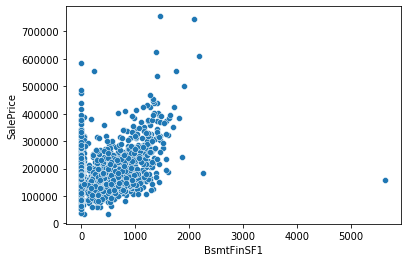

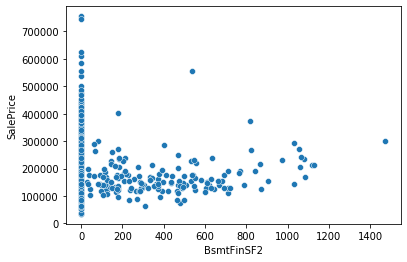

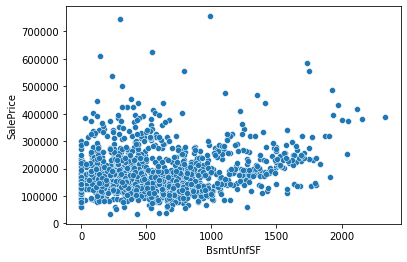

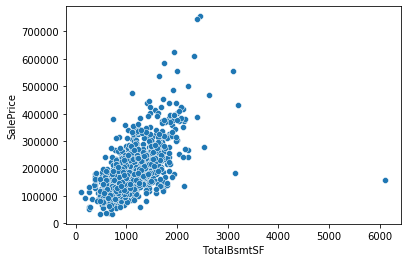

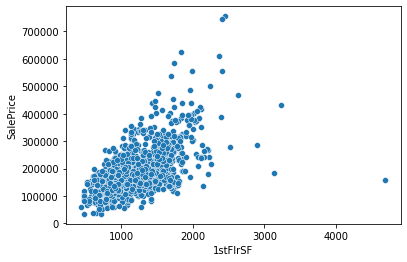

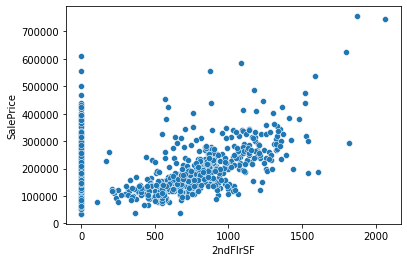

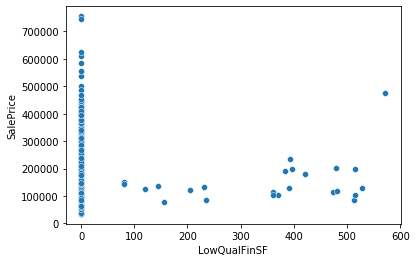

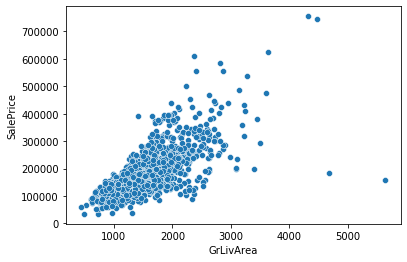

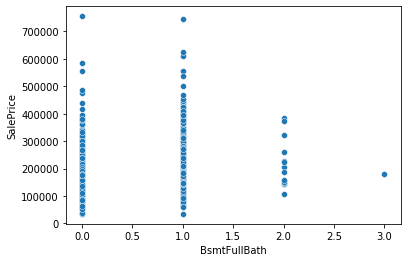

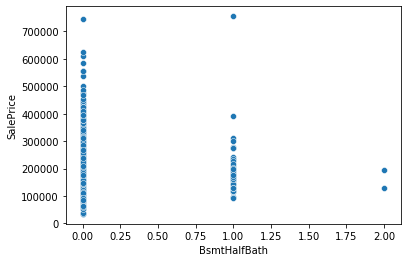

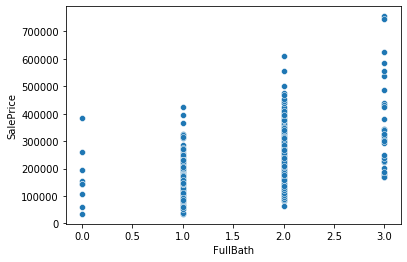

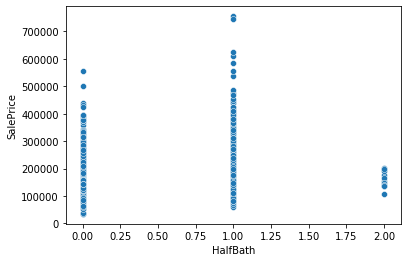

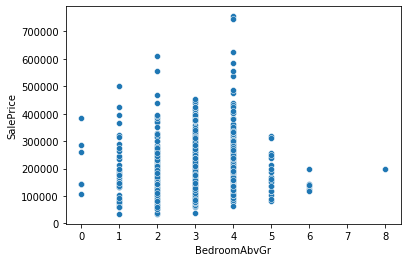

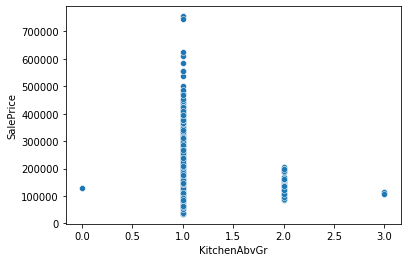

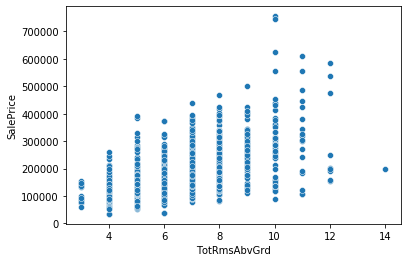

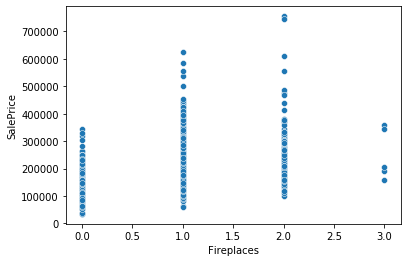

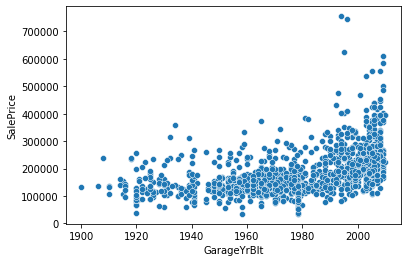

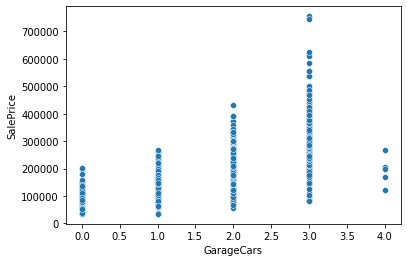

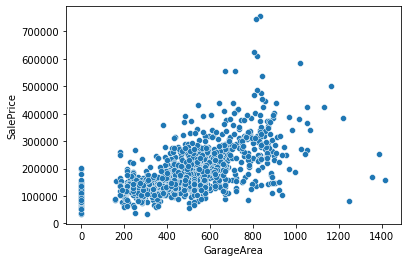

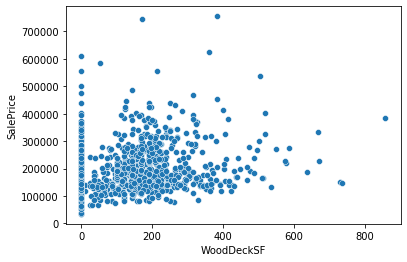

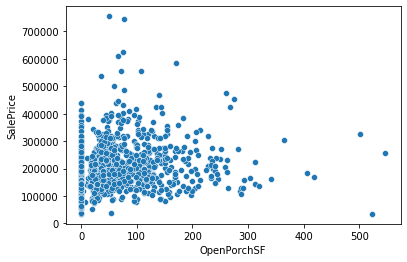

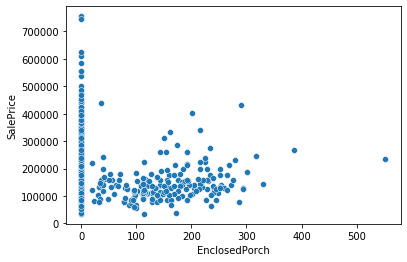

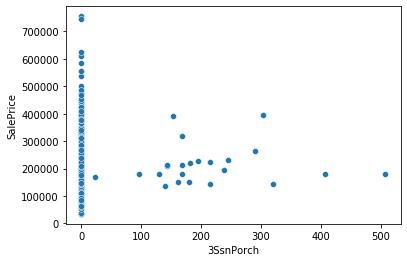

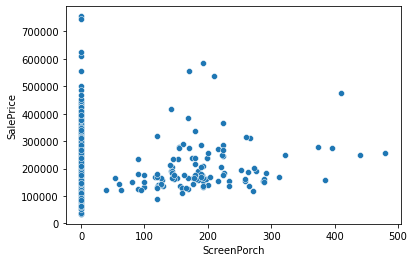

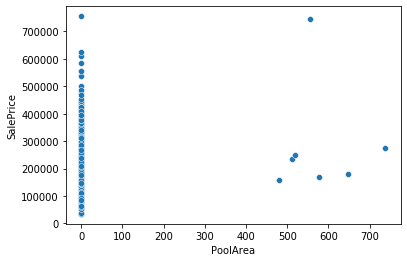

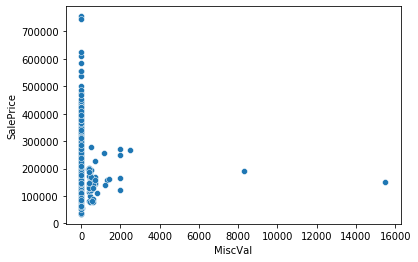

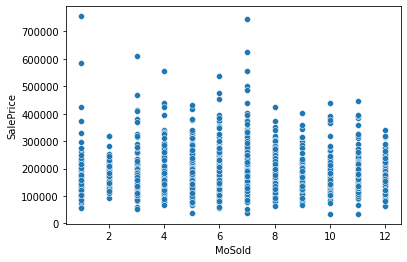

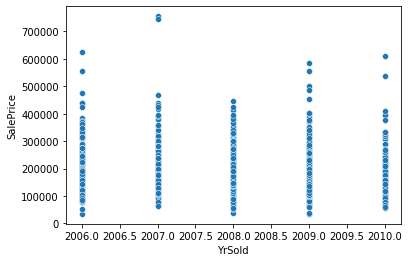

In [47]:
for col in numerical_cols[:-1]:  # Excluding the 'SalePrice' column
    sns.scatterplot(x=col, y='SalePrice', data=house_df_cleaned)
    plt.show()

<font color = 'blue'>
- From the above- you may notice multiple variables show a linear trend with the 'SalePrice' variable. <br/>
- Posibility of using Regression Model - Acceptable

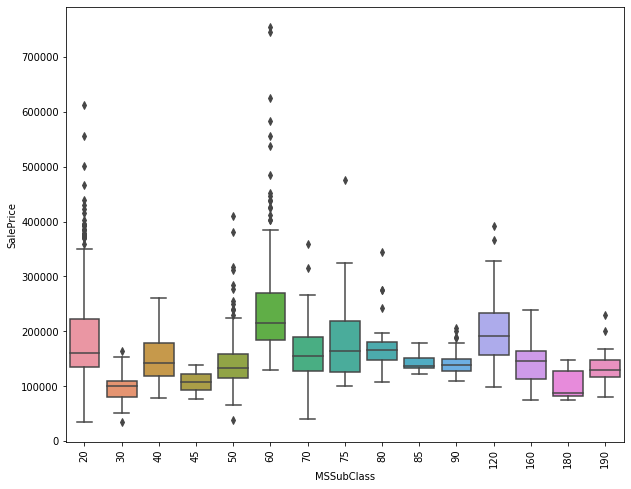

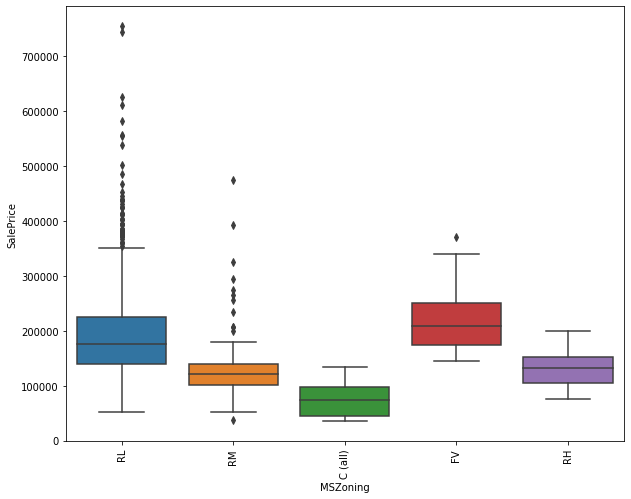

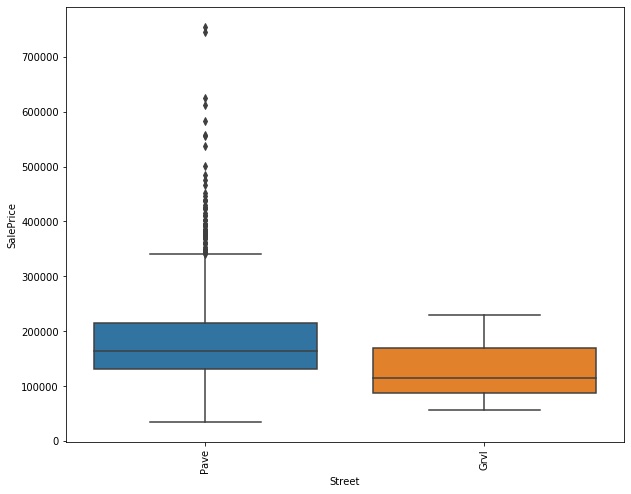

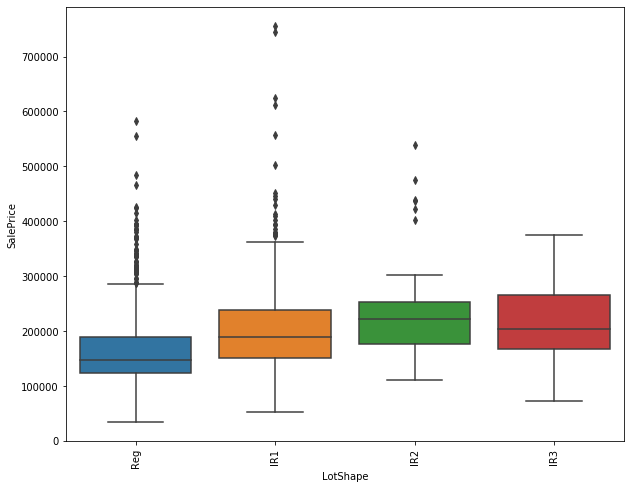

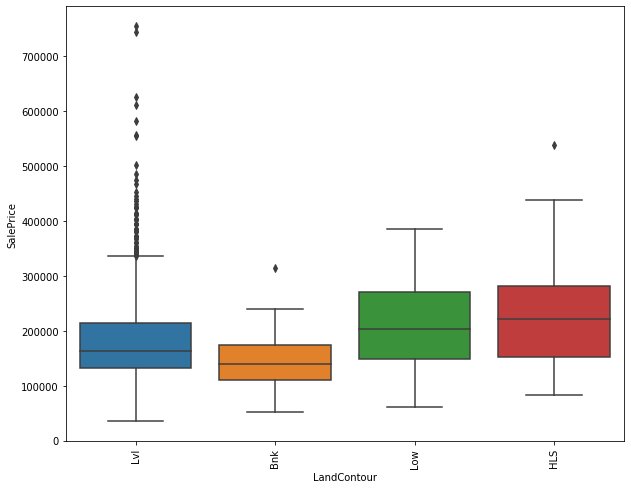

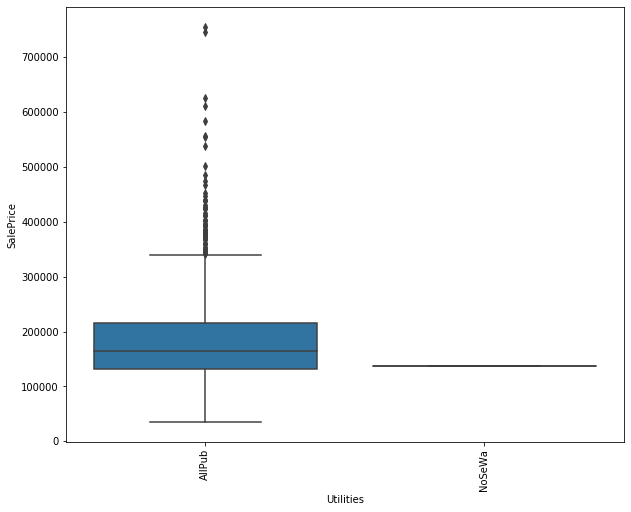

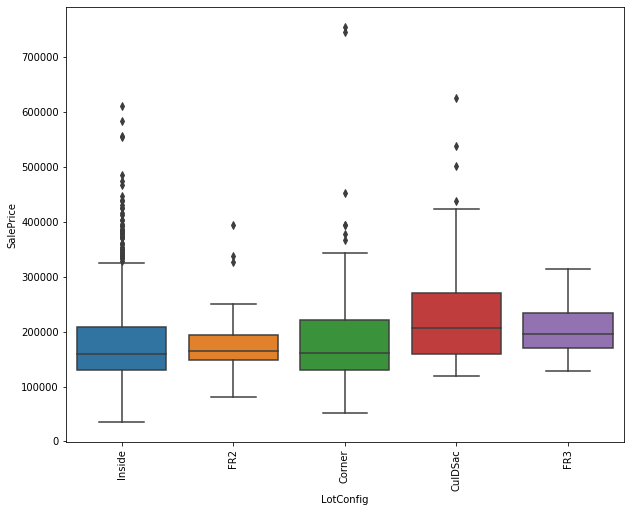

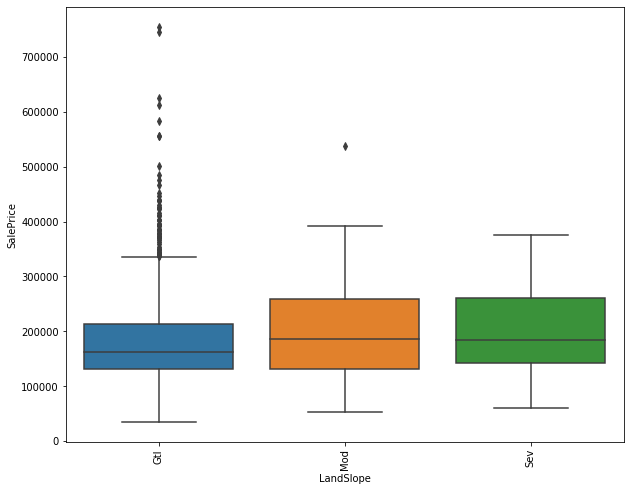

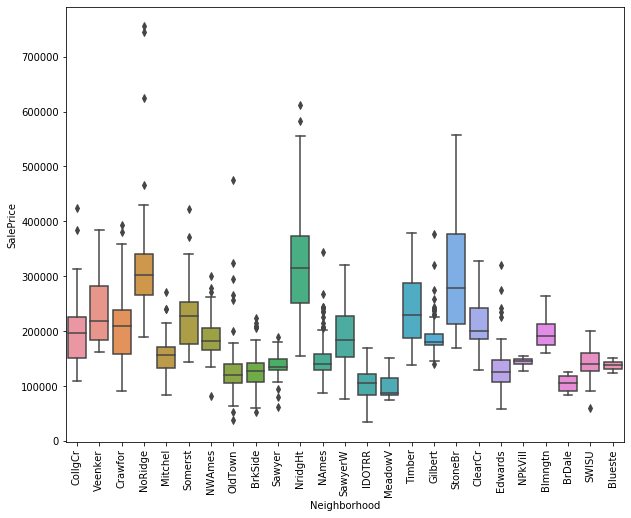

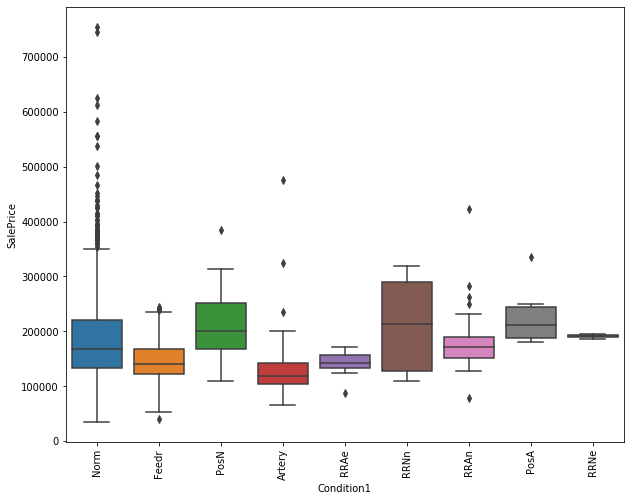

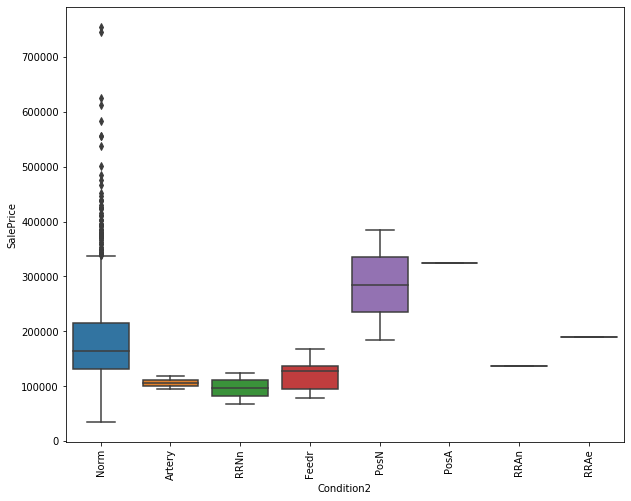

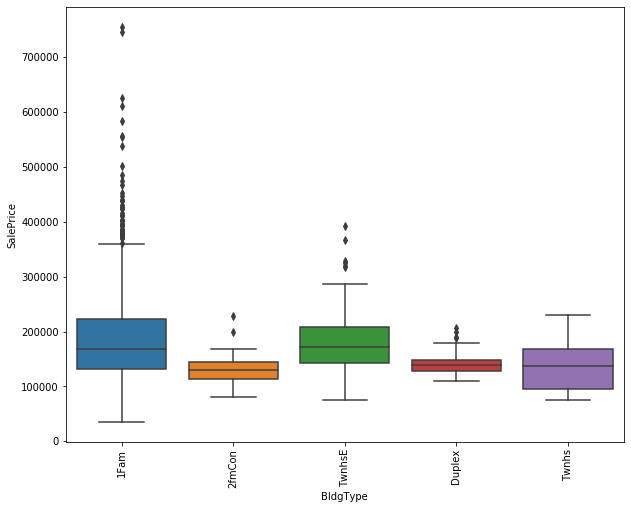

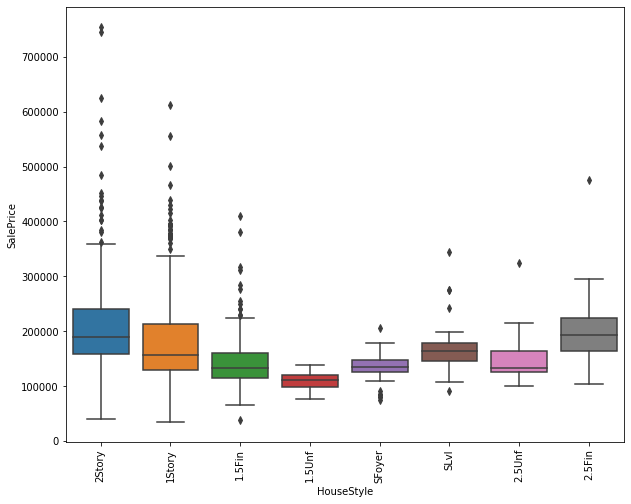

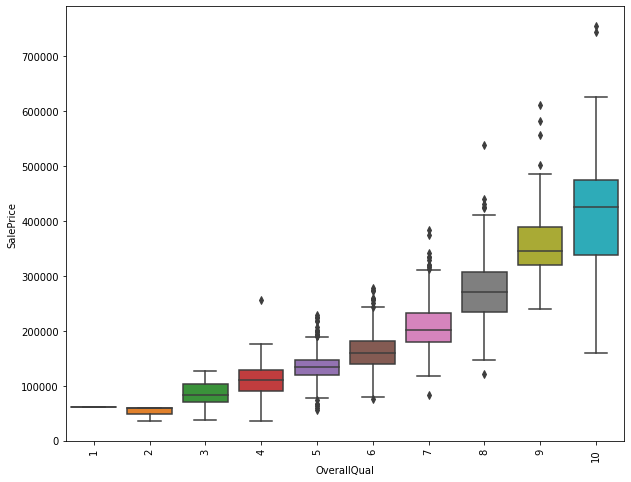

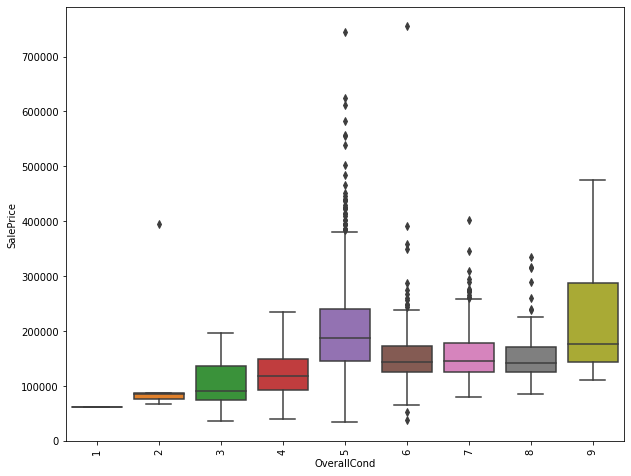

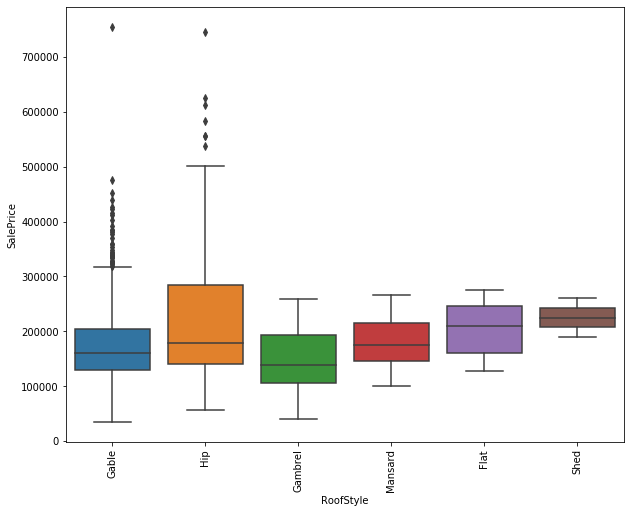

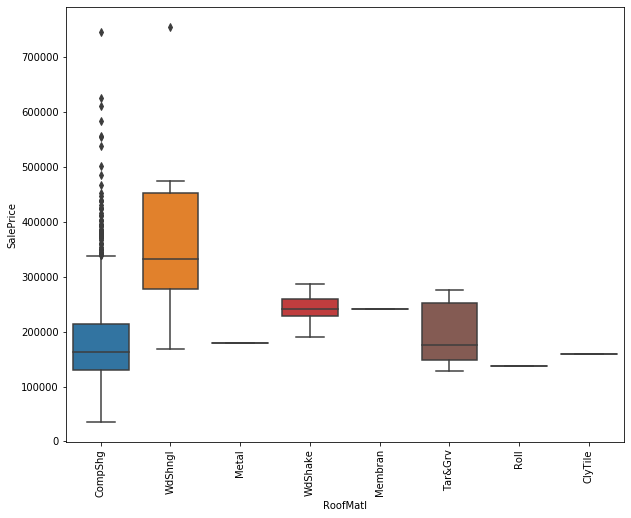

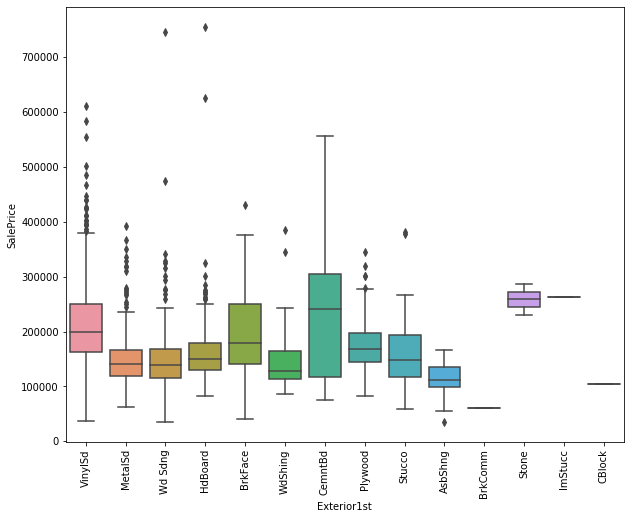

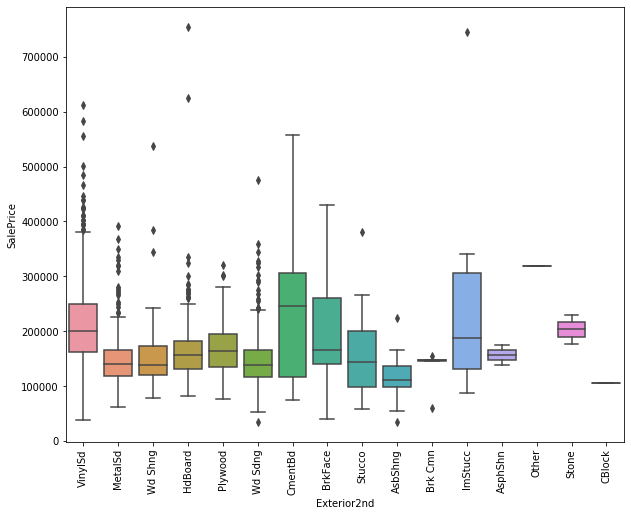

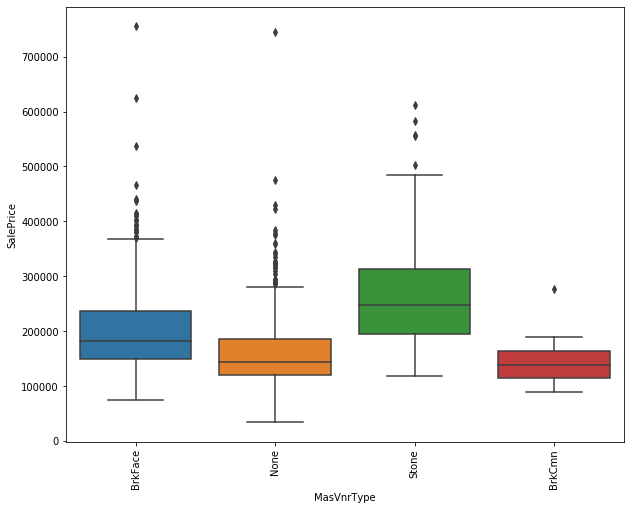

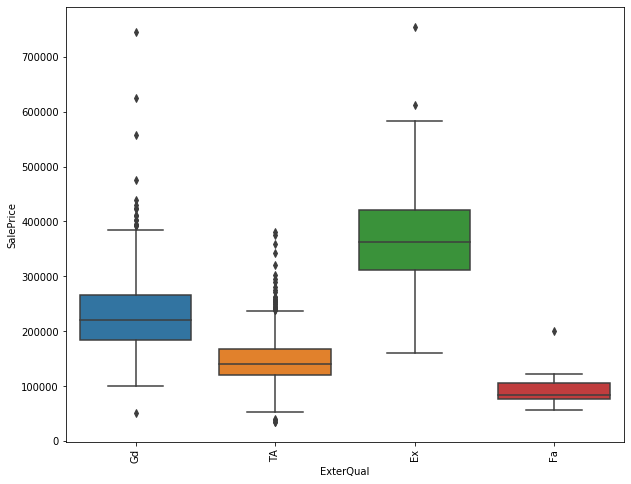

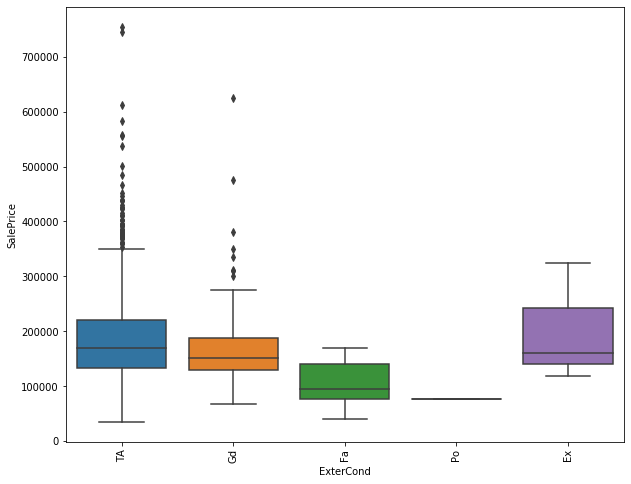

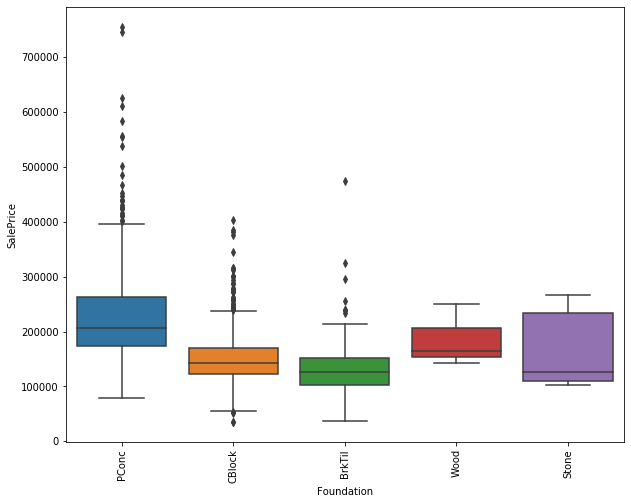

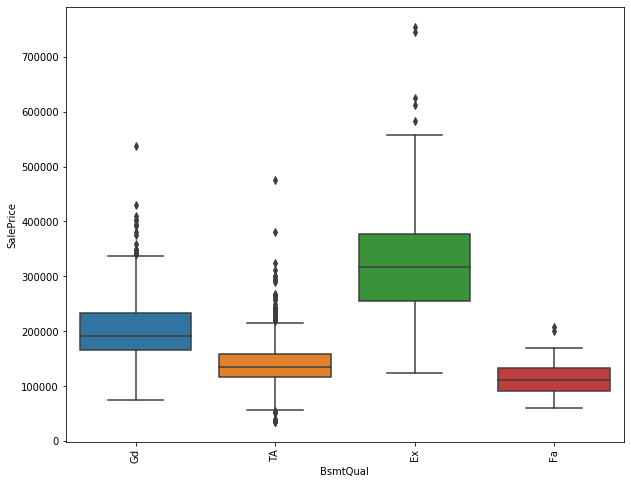

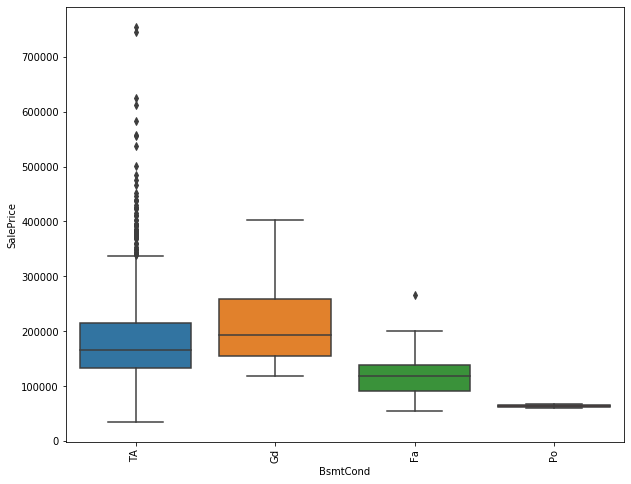

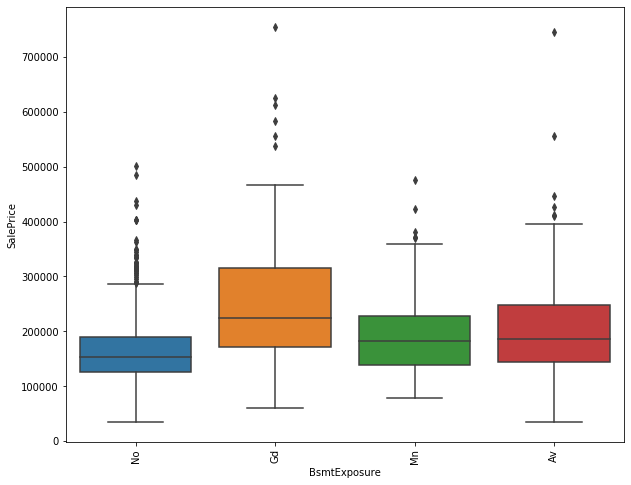

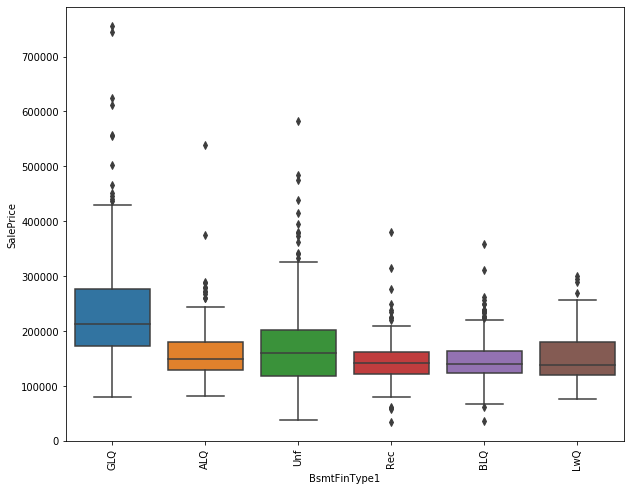

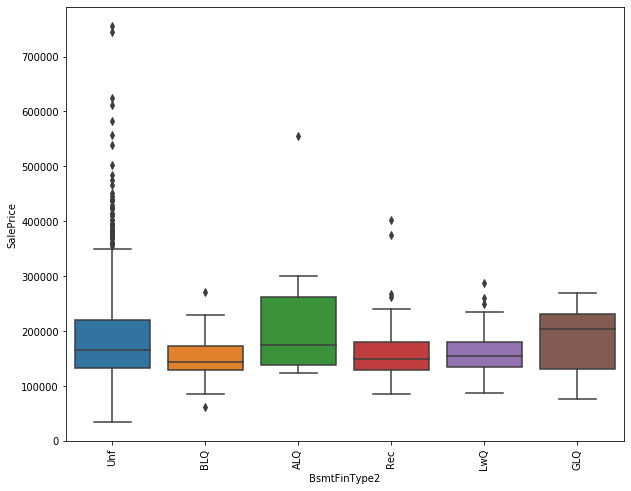

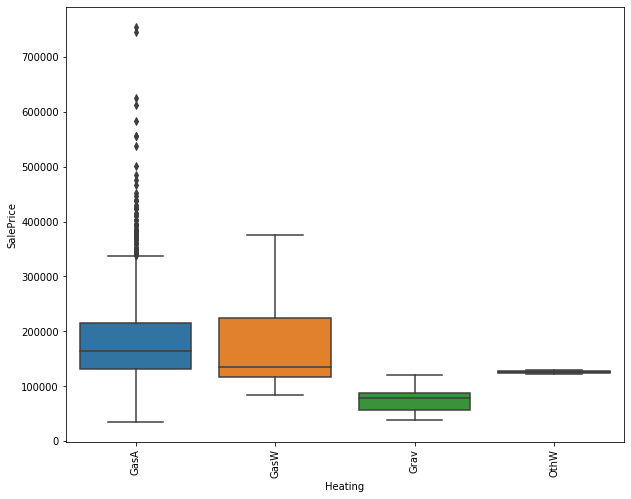

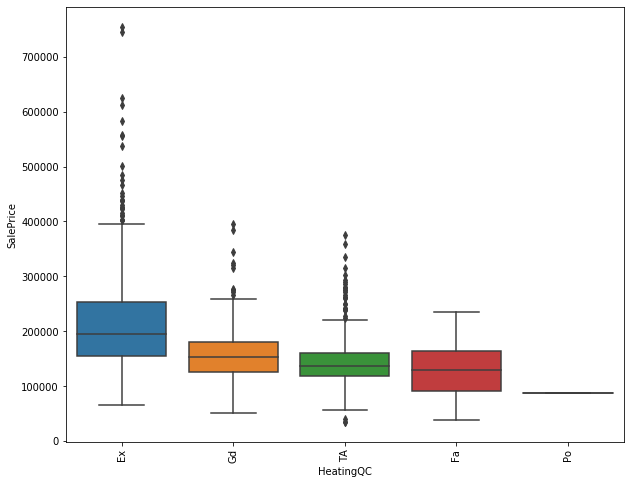

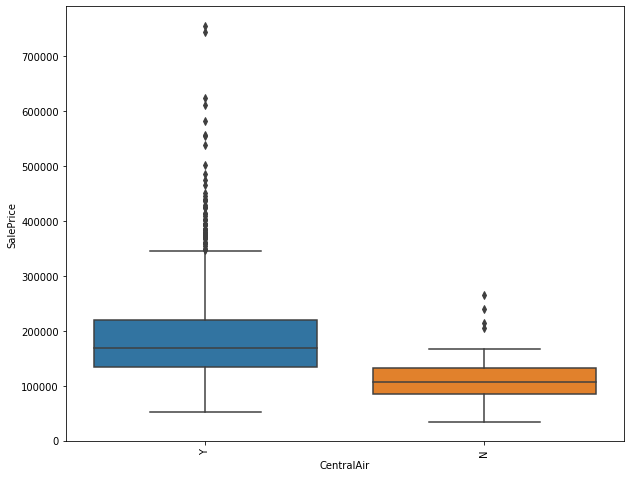

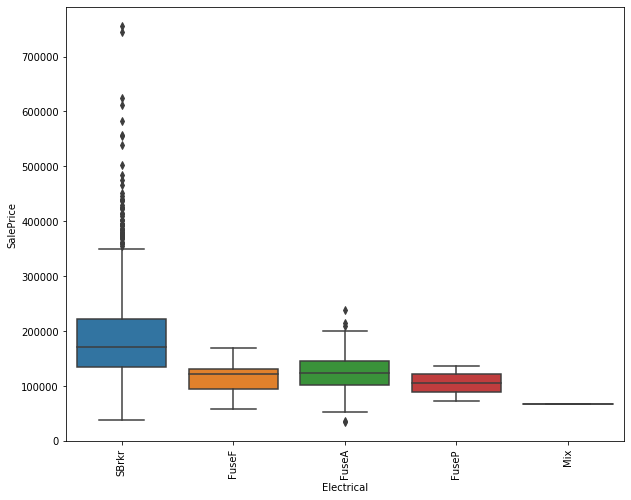

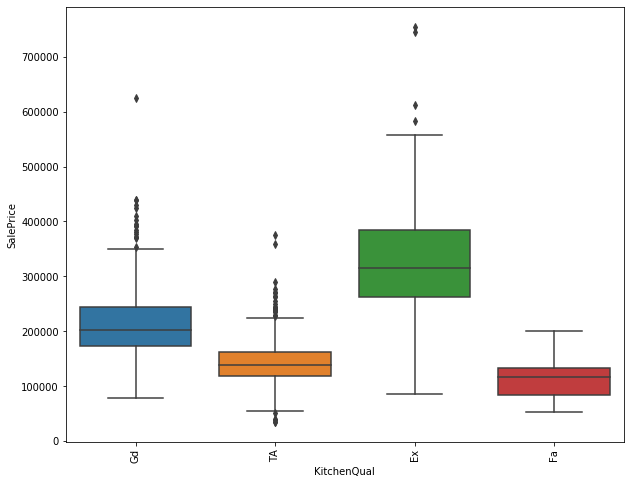

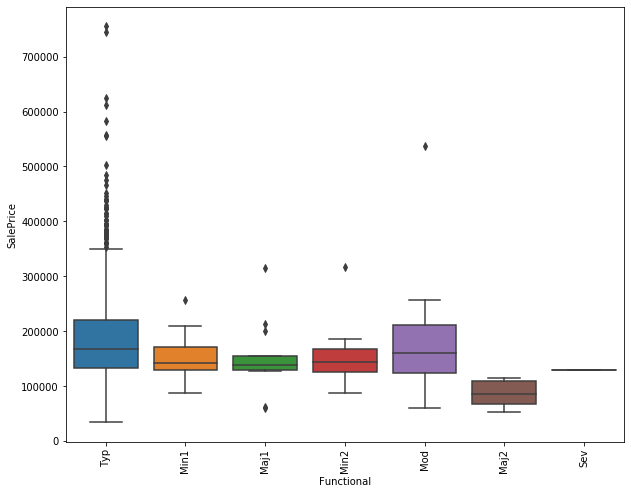

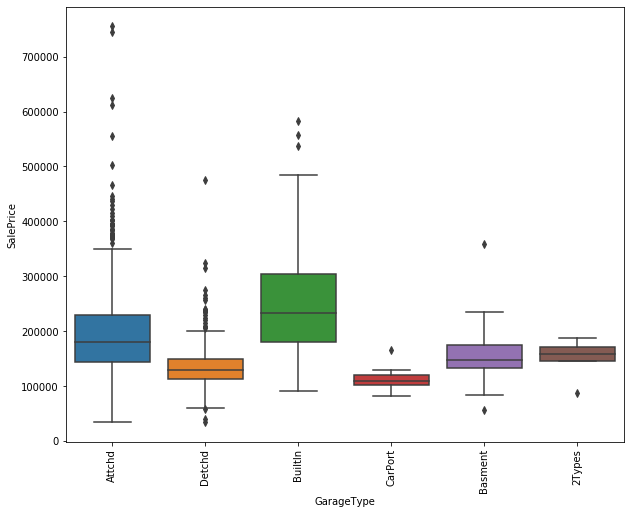

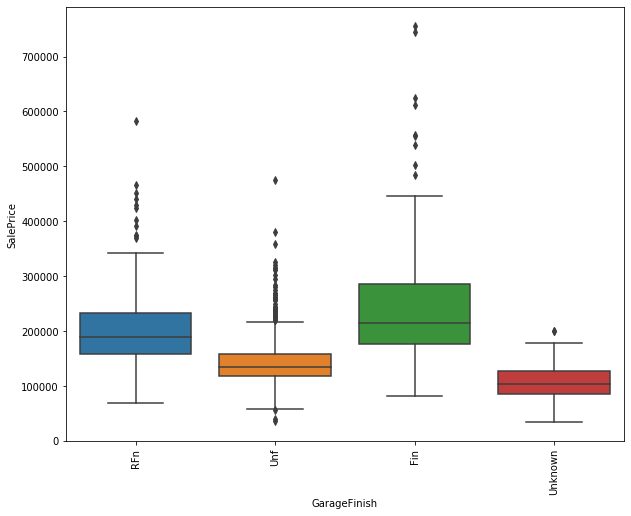

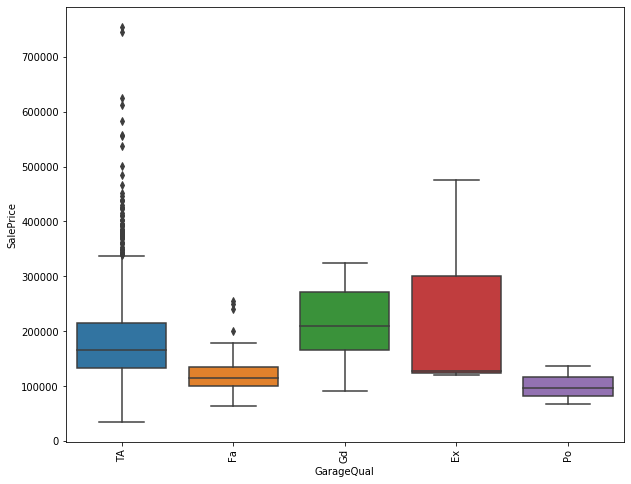

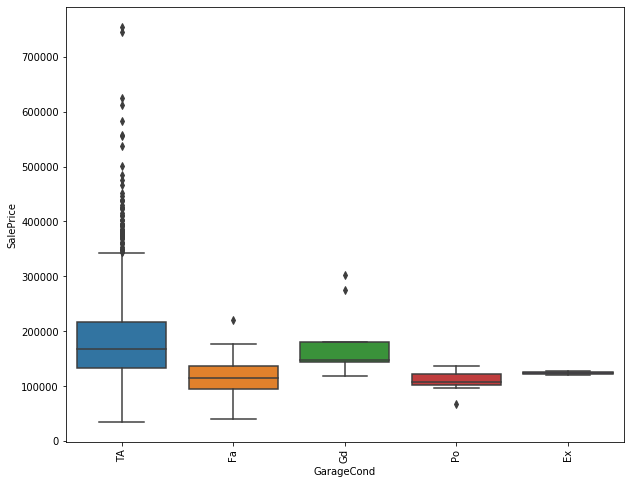

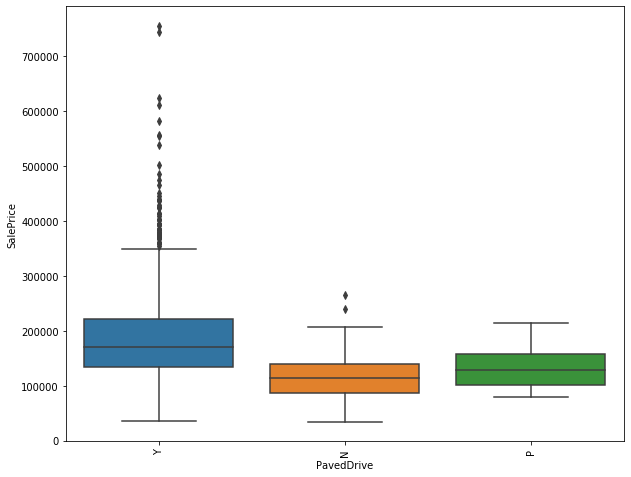

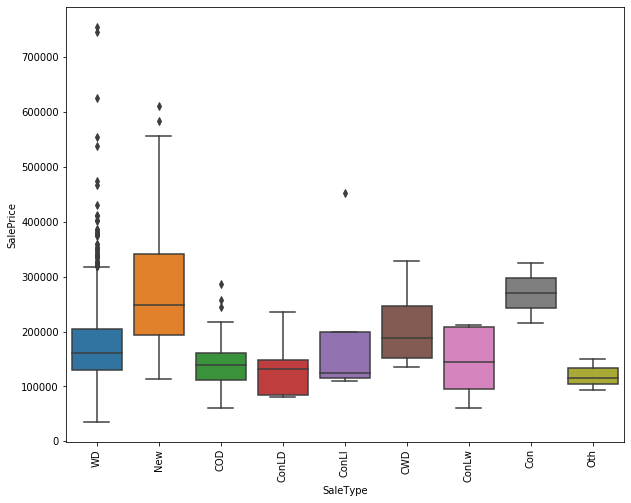

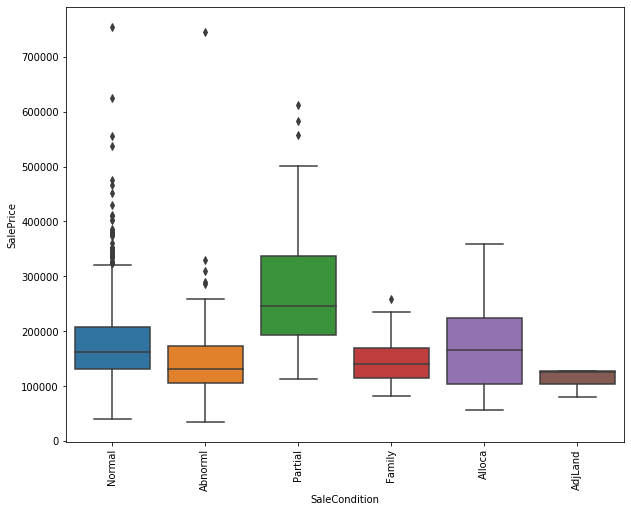

In [48]:
for col in categorical_cols:
    plt.figure(figsize=(10, 8))
    sns.boxplot(x=col, y='SalePrice', data=house_df_cleaned)
    plt.xticks(rotation=90)
    plt.show()

#### Few Inferences from Categorical columns
- MsZoning with of type 'Fv' has high Saleprice and type 'C' has least sale price
- The Street of type 'Pave' has more Sale Price when compared to 'Grvl'
- the utlities coulms have most of its values as 'AllPub'. Hence this col will not provide much information - not an imp feature
- House with Exterior Quality of type Execellent has the highest SalePrice.
- House with Basement Quality of type Execellent has the highest SalePrice.
- House with Basement Condition of type Good has the highest SalePrice.
- The Central air of type 'Yes' has more Sale Price when compared to 'No'
- The house with Kitchen Quality of type Execellent has the highest SalePrice.
- The house with Garage Type of type BuiltIn has the highest SalePrice.
- The house with Sale Type of type New has the highest SalePrice.

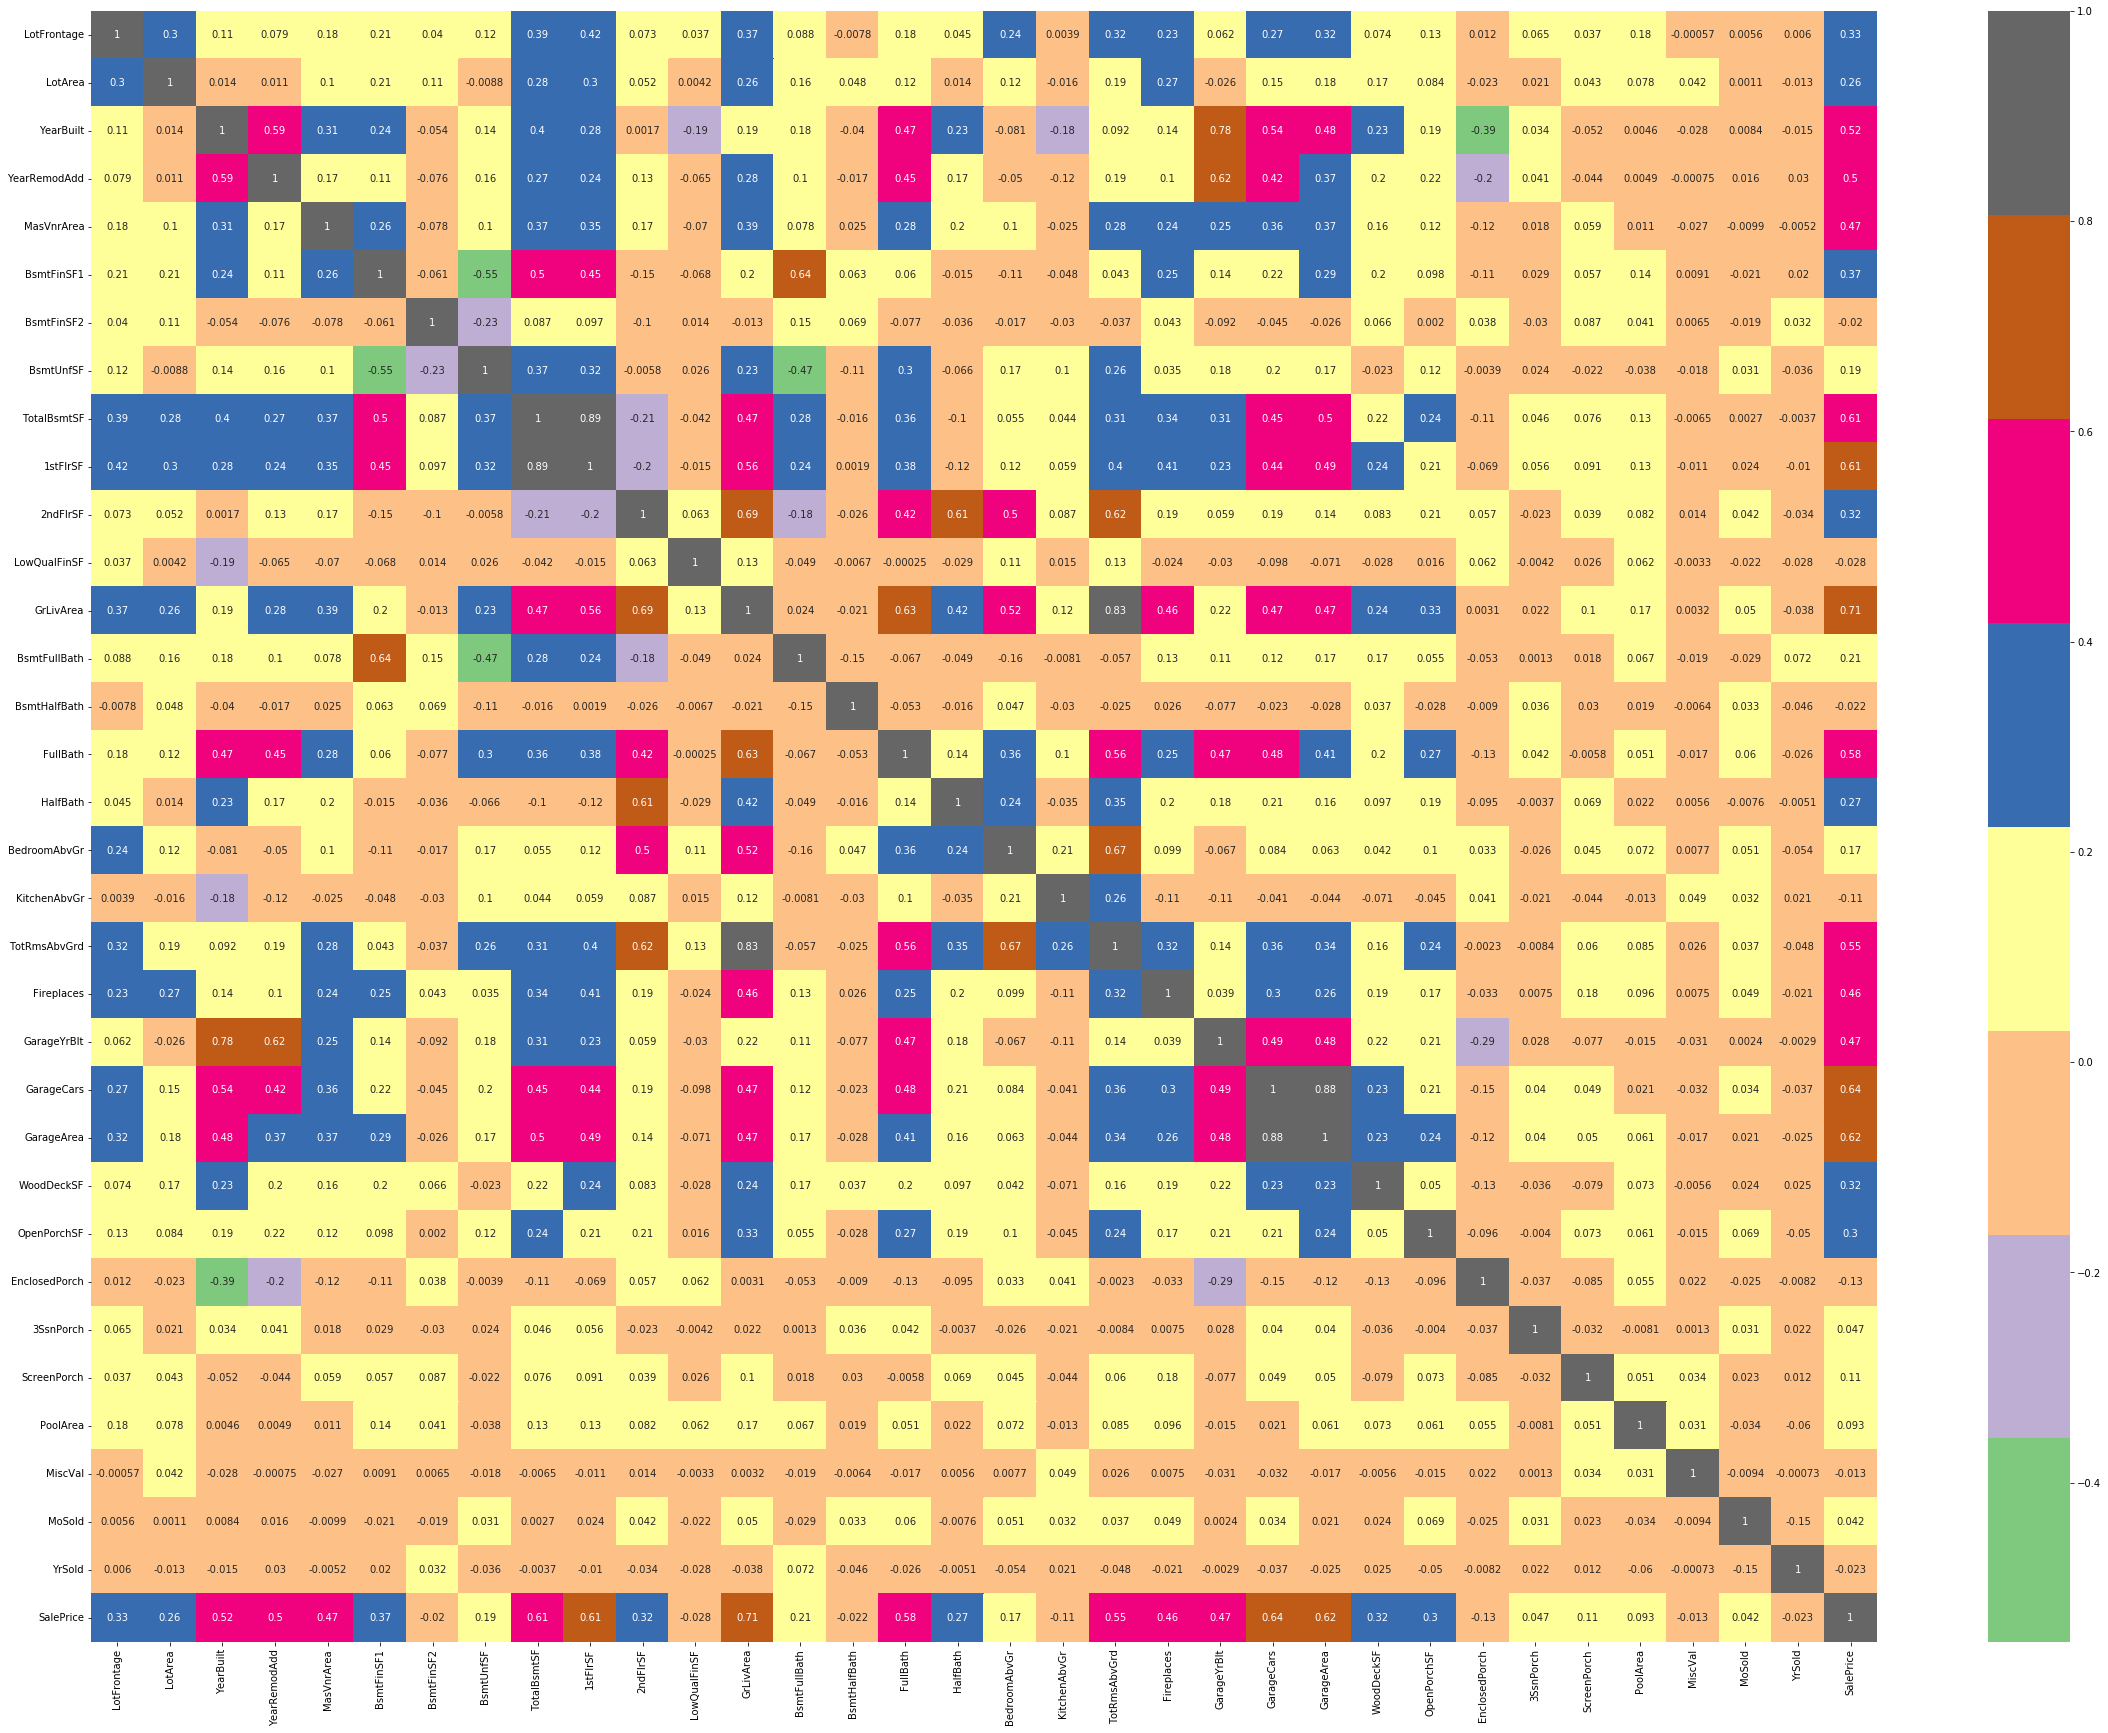

In [49]:
#Checking correlation
plt.figure(figsize=(40,30))
house_corr = house_df_cleaned.corr()
sns.heatmap(house_corr, annot=True,cmap="Accent")

In [50]:
# Highly correlated columns:
# GarageArea is highly correlated with GarageCars (0.88)
# TotRmsAbvGrd is hightly correlated with GrLivArea (0.83)
# 1stFlrSF is highly correlated with TotalBsmtSF (0.89)

# Removing these columns which are highly correlated
house_df_cleaned.drop(columns=['GarageArea','TotRmsAbvGrd','1stFlrSF'], axis=1, inplace=True)

In [51]:
house_df_cleaned

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,Attchd,2003.0,RFn,2,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,0,0,1262,0,1,2,0,3,1,TA,Typ,1,Attchd,1976.0,RFn,2,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,Attchd,2001.0,RFn,2,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Detchd,1998.0,Unf,3,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,Attchd,2000.0,RFn,3,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,694,0,1647,0,0,2,1,3,1,TA,Typ,1,Attchd,1999.0,RFn,2,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,0,0,2073,1,0,2,0,3,1,TA,Min1,2,Attchd,1978.0,Unf,2,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1152,0,2340,0,0,2,0,4,1,Gd,Typ,2,Attchd,1941.0,RFn,1,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,0,0,1078,1,0,1,0,2,1,Gd,Typ,0,Attchd,1950.0,Unf,1,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [52]:
# Checking outliers at 25%,50%,75%,90%,95% and above

house_df_cleaned.describe(percentiles=[.25,.5,.75,.90,.95,.99]).transpose()

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
LotFrontage,1412.0,69.936969,22.287430,21.0,60.00,69.000000,79.00,92.0,104.45,137.89,313.0
LotArea,1412.0,10536.987252,10113.840927,1300.0,7572.75,9500.000000,11618.25,14435.3,17410.35,38817.56,215245.0
YearBuilt,1412.0,1971.428470,30.371732,1872.0,1954.00,1973.000000,2000.25,2006.0,2007.00,2009.00,2010.0
YearRemodAdd,1412.0,1985.191218,20.462484,1950.0,1968.00,1994.000000,2004.00,2006.0,2007.00,2009.00,2010.0
MasVnrArea,1412.0,105.366856,182.340601,0.0,0.00,0.000000,168.00,336.0,456.00,795.12,1600.0
BsmtFinSF1,1412.0,453.694759,455.373263,0.0,0.00,399.000000,719.25,1069.5,1274.00,1572.89,5644.0
BsmtFinSF2,1412.0,47.792493,163.410333,0.0,0.00,0.000000,0.00,124.8,404.95,839.02,1474.0
BsmtUnfSF,1412.0,581.065156,437.571238,0.0,247.00,490.000000,813.25,1234.0,1468.90,1799.45,2336.0
TotalBsmtSF,1412.0,1082.552408,404.766998,105.0,809.50,1004.000000,1306.75,1604.0,1752.45,2151.13,6110.0
2ndFlrSF,1412.0,350.942635,437.740925,0.0,0.00,0.000000,730.50,959.6,1142.00,1411.58,2065.0


In [53]:
numerical_cols = house_df_cleaned.select_dtypes(include='number').columns

In [54]:
#Dropping Outliers:
def drop_outliers(df=house_df_cleaned):
    """
        Drop records with outliers present
        Lower quantile is .25, Upper quantile is .99
    """
    for column in numerical_cols:
        Q1 = df[column].quantile(.25)
        Q3 = df[column].quantile(.99)
        IQR = Q3 - Q1
        df = df[(df[column] >= (Q1 - (1.5 * IQR))) & df[column] <= (Q3 + (1.5 * IQR))]
    return df

In [55]:
house_df_cleaned = drop_outliers(house_df_cleaned)
house_df_cleaned.shape

(1410, 72)

#### Newly derived columns from year columns in dataset

In [56]:
#YearBuilt = Original construction date
#YearRemodAdd = Remodel date (same as construction date if no remodeling or additions)
#YrSold = Year Sold
#GarageYrBlt = Year garage was built

house_df_cleaned[["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


In [57]:
# Deriving new column "HouseAge" representing age of the house - as the difference between YrSold and YearRemodAdd
# Taking YearRemodAdd as it will mean if the house was remodelled - means it became better than Original construction date
house_df_cleaned['HouseAge'] = house_df_cleaned['YrSold'] - house_df_cleaned['YearRemodAdd']
house_df_cleaned['HouseAge'].head()

0     5
1    31
2     6
3    36
4     8
Name: HouseAge, dtype: int64

In [58]:
# Deriving a new column to check if the house was remodelled or not
house_df_cleaned['HouseAge'].min()

-1

In [59]:
def checkRemodel(row):
    if(row['HouseAge'] == 0):
        return 0
    elif(row['HouseAge'] > 0):
        return 1
    else:
        return 2
    
house_df_cleaned['IsRemodelled'] = house_df_cleaned.apply(checkRemodel, axis=1)
house_df_cleaned['IsRemodelled'].value_counts()


1    1288
0     121
2       1
Name: IsRemodelled, dtype: int64

In [60]:
house_df_cleaned.GarageYrBlt.value_counts()

1978.506164    74
2005.000000    65
2006.000000    58
2004.000000    53
2003.000000    47
2007.000000    45
1977.000000    33
1998.000000    31
1999.000000    30
2008.000000    29
1976.000000    29
2000.000000    27
1968.000000    26
2002.000000    22
1993.000000    22
1950.000000    21
1966.000000    21
2009.000000    21
1958.000000    21
1965.000000    21
1970.000000    20
2001.000000    20
1962.000000    20
1954.000000    19
1996.000000    19
1997.000000    19
1957.000000    18
1994.000000    18
1960.000000    18
1974.000000    18
1964.000000    18
1995.000000    18
1978.000000    17
1963.000000    16
1959.000000    16
1990.000000    16
1980.000000    15
1969.000000    15
1972.000000    14
1988.000000    14
1973.000000    14
1920.000000    14
1940.000000    14
1992.000000    13
1971.000000    13
1967.000000    13
1961.000000    13
1956.000000    13
1953.000000    12
1979.000000    11
1955.000000    11
1948.000000    11
1981.000000    10
1941.000000    10
1987.000000    10
1925.00000

In [61]:
# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 

def GarageConstructionPeriod(row):
    if row >= 1900 and row < 2000:
        return 0
    else:   
        return 1
    
house_df_cleaned['OldOrNewGarage'] = house_df_cleaned['GarageYrBlt'].apply(GarageConstructionPeriod)
house_df_cleaned['OldOrNewGarage'].value_counts()

0    1020
1     390
Name: OldOrNewGarage, dtype: int64

In [62]:
#Dropping the columns with "year" as we have used them to create new columns
house_df_cleaned.drop(["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"], axis = 1, inplace = True)
house_df_cleaned.shape

(1410, 71)

#### Handling Categorical columns

Manually encoding few categorical columns

In [63]:
#list of variables to map
def map_function(x):
    return x.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Na':0})
def map_function1(x):
    return x.map({'Gd':4,'Av':3,'Mn':2,'No':1,'Na':0})
def map_function2(x):
    return x.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
def map_function3(x):
    return x.map({'Y':1,'N':0})
def map_function4(x):
    return x.map({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1})
def map_function5(x):
    return x.map({'Fin':3,'RFn':2,'Unf':1,'NA':0,'Unknown':0})
def map_function6(x):
    return x.map({'Y':2,'P':2,'N':0})

In [64]:
house_df_cleaned['ExterQual'] = house_df_cleaned[['ExterQual']].apply(map_function)
house_df_cleaned['ExterCond'] = house_df_cleaned[['ExterCond']].apply(map_function)
house_df_cleaned['BsmtQual'] = house_df_cleaned[['BsmtQual']].apply(map_function)
house_df_cleaned['BsmtCond'] = house_df_cleaned[['BsmtCond']].apply(map_function)
house_df_cleaned['KitchenQual'] = house_df_cleaned[['KitchenQual']].apply(map_function)
house_df_cleaned['GarageQual'] = house_df_cleaned[['GarageQual']].apply(map_function)
house_df_cleaned['GarageCond'] = house_df_cleaned[['GarageCond']].apply(map_function)
house_df_cleaned['HeatingQC'] = house_df_cleaned[['HeatingQC']].apply(map_function)
house_df_cleaned['BsmtExposure'] = house_df_cleaned[['BsmtExposure']].apply(map_function1)

house_df_cleaned['BsmtFinType1'] = house_df_cleaned[['BsmtFinType1']].apply(map_function2)
house_df_cleaned['BsmtFinType2'] = house_df_cleaned[['BsmtFinType2']].apply(map_function2)

house_df_cleaned['CentralAir'] = house_df_cleaned[['CentralAir']].apply(map_function3)

house_df_cleaned['Functional'] = house_df_cleaned[['Functional']].apply(map_function4)

house_df_cleaned['GarageFinish'] = house_df_cleaned[['GarageFinish']].apply(map_function5)

house_df_cleaned['PavedDrive'] = house_df_cleaned[['PavedDrive']].apply(map_function6)

In [65]:
# Checking for remaining categorical columns in the dataset
categorical_cols = house_df_cleaned.select_dtypes(include='object').columns
categorical_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating', 'Electrical', 'GarageType', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [66]:
#Creating Dummy variables for all categorical variables
dummy = pd.get_dummies(house_df_cleaned[categorical_cols],drop_first=True)
print(dummy.shape)
dummy.head()

(1410, 171)


,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

In [67]:
#Adding the dummy data to cleaned data
house_final = pd.concat([house_df_cleaned, dummy],axis=1)
house_final.shape

(1410, 242)

In [68]:
#dropping categorical columns
house_final = house_final.drop(columns=categorical_cols, axis=1)
house_final.shape

(1410, 216)

### <font color = 'blue'> Data Preprocessing

#### Targer Variable

In [69]:
#SalePrice is the target variable
house_final['SalePrice'].describe()

count      1410.000000
mean     182060.223404
std       77876.378647
min       34900.000000
25%      131425.000000
50%      164500.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

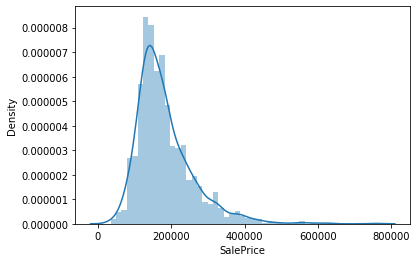

In [70]:
#plotting the distribution of SalePrice
sns.distplot(house_final['SalePrice'])
plt.show()

In [71]:
# As we can see that the target variable is skewed - we need to transformt the variable to make it normally distributed
# using log transformation

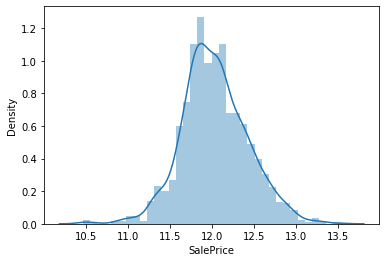

In [72]:
house_final['SalePrice'] = np.log(house_final['SalePrice'])
#plotting the distribution of SalePrice again:
sns.distplot(house_final['SalePrice'])
plt.show()

### <font color = 'blue'> Data Modelling

In [73]:
#Train Test Split

In [74]:
df_train, df_test = train_test_split(house_final, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(986, 216)
(424, 216)


In [75]:
y_train = df_train.pop('SalePrice')
X_train = df_train

print(X_train.shape)

(986, 215)


In [76]:
y_test = df_test.pop('SalePrice')
X_test = df_test

print(X_test.shape)

(424, 215)


In [77]:
# Scaling the variables

In [78]:
y_train.head()

53      12.860999
211     12.133502
549     12.479909
739     12.154779
1261    11.766792
Name: SalePrice, dtype: float64

In [79]:
num_vars = X_train.select_dtypes(include='number').columns
num_vars

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=215)

In [80]:
scaler = MinMaxScaler() #using minmax scaler as it will preserve the shape of the dataset
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [81]:
X_train.shape

(986, 215)

In [82]:
X_train.head()

,LotFrontage,LotArea,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,HouseAge,IsRemodelled,OldOrNewGarage,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
53,0.160959,0.228895,0.0,0.666667,0.5,1.000000,0.666667,1.000000,1.0,0.320695,0.0,0.0,0.013699,0.289259,0.75,1.0,0.000000,0.0,0.269792,0.666667,0.0,0.000000,0.5,0.000,0.333333,0.666667,1.0,0.333333,1.000000,0.75,0.5,0.5,1.0,1.000000,0.131627,0.0,0.0,0.0,0.0,0.0,0.909091,0.316667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,

In [83]:
X_test.head()

,LotFrontage,LotArea,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,HouseAge,IsRemodelled,OldOrNewGarage,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
357,0.078767,0.013667,0.000000,0.333333,0.50,0.666667,0.666667,0.000000,0.8,0.154855,0.0,0.000000,0.114726,0.172689,0.5,1.0,0.0,0.0,0.135281,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.333333,1.0,0.333333,1.000000,0.50,0.5,0.5,1.0,0.625438,0.164534,0.0,0.0,0.0,0.0,0.0,0.636364,0.516667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.

In [84]:
#Building simple linear regression

In [85]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [86]:
print(lr.coef_)
print(lr.intercept_)

[ 1.14723776e-01  5.31016168e-01  6.87092533e-03  1.19998523e-02
 -6.95368767e-02  1.67325672e-02  3.76260879e-02  3.24487228e-02
  2.78873286e-02 -8.55347049e+11 -3.05700363e-02 -2.23384400e+11
 -3.54020324e+11  9.10056526e+11  4.40461397e-02  7.21720094e-02
  1.17023762e-01  1.35003239e-02  1.15842580e+00  8.05015083e-02
  3.16906510e-02  9.54644863e-02  5.25423479e-02 -6.58453517e-02
 -7.52936548e-02  2.16103595e-02  1.10957133e-01  5.12555176e-02
  2.09789900e-02  2.09197882e-01  2.40251594e-01 -1.10081009e-01
  7.14584377e-03  8.66355996e-02  7.44684438e-02  1.21874686e-02
  1.16477111e-01  1.22691658e-01  1.99342430e-01 -4.99489789e-02
  5.82522185e-03 -5.76232672e-02  4.70440505e-02  2.83634952e-02
 -8.78206012e-02 -2.34630102e-02 -2.63191796e-01  2.46058140e-02
  2.30065651e-02  1.04873181e-02 -2.45659253e-01 -1.14865724e-01
 -5.73186898e-02 -1.02224416e+11 -4.41657929e-02 -6.37670550e-02
 -1.23086719e-01 -8.25209129e-02  5.77408268e-01  4.45455863e-01
  5.18885908e-01  4.78125

In [87]:
list(zip(list(lr.coef_), X_train.columns))

[(0.11472377570374012, 'LotFrontage'),
 (0.531016168264299, 'LotArea'),
 (0.006870925332181435, 'MasVnrArea'),
 (0.011999852320669524, 'ExterQual'),
 (-0.06953687670571677, 'ExterCond'),
 (0.016732567176259636, 'BsmtQual'),
 (0.03762608793393096, 'BsmtCond'),
 (0.032448722804539254, 'BsmtExposure'),
 (0.02788732863705956, 'BsmtFinType1'),
 (-855347049392.4668, 'BsmtFinSF1'),
 (-0.03057003629912898, 'BsmtFinType2'),
 (-223384399504.7371, 'BsmtFinSF2'),
 (-354020323774.19806, 'BsmtUnfSF'),
 (910056525798.6804, 'TotalBsmtSF'),
 (0.04404613971917959, 'HeatingQC'),
 (0.0721720094026752, 'CentralAir'),
 (0.11702376193698474, '2ndFlrSF'),
 (0.013500323921142058, 'LowQualFinSF'),
 (1.1584257994217821, 'GrLivArea'),
 (0.08050150833819958, 'BsmtFullBath'),
 (0.031690650967273755, 'BsmtHalfBath'),
 (0.09546448628935722, 'FullBath'),
 (0.05254234791673404, 'HalfBath'),
 (-0.06584535169833654, 'BedroomAbvGr'),
 (-0.07529365482206778, 'KitchenAbvGr'),
 (0.02161035950641621, 'KitchenQual'),
 (0.11095

In [88]:
# Predicting on the train set
y_train_pred = lr.predict(X_train)

In [89]:
# Checking the r2_score
r2_score(y_train, y_train_pred)

0.9518125883841434

In [90]:
# Predicting on the test set
y_test_pred = lr.predict(X_test)

In [91]:
# Checking the r2_score
r2_score(y_test, y_test_pred)

-2.4125115990997132e+16

In [92]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_pred))
print(rss)
mse = mean_squared_error(y_train, y_train_pred)
print(mse)
# Root Mean Squared Error
rmse = mse**0.5
print(rmse)

7.2612031956536995
0.00736430344386785
0.08581551983101804


In [93]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_test_pred))
print(rss)
mse = mean_squared_error(y_test, y_test_pred)
print(mse)
# Root Mean Squared Error
rmse = mse**0.5
print(rmse)

1.5772879917109258e+18
3720018848374825.0
60991957.243351564


# Ridge

In [94]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                    0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [95]:
ridge = Ridge()

In [96]:
folds = 5
model_ridge = GridSearchCV(estimator=ridge,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)
model_ridge.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [97]:
cv_results = pd.DataFrame(model_ridge.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006452,0.003475,0.007501,0.004253,0.0001,{'alpha': 0.0001},-0.111011,-0.100111,-0.096156,-0.082084,-0.094110,-0.096695,0.009350,21,-0.058699,-0.059312,-0.056851,-0.061987,-0.060036,-0.059377,0.001679
1,0.009127,0.000573,0.004190,0.003791,0.001,{'alpha': 0.001},-0.110699,-0.099733,-0.096061,-0.081956,-0.094064,-0.096503,0.009271,19,-0.058708,-0.059344,-0.056874,-0.062023,-0.060040,-0.059398,0.001682
2,0.008275,0.003169,0.003773,0.003228,0.01,{'alpha': 0.01},-0.108509,-0.097330,-0.095863,-0.082454,-0.093675,-0.095566,0.008321,10,-0.059061,-0.059823,-0.057526,-0.062599,-0.060096,-0.059821,0.001652
3,0.003124,0.006249,0.000000,0.000000,0.05,{'alpha': 0.05},-0.105268,-0.095560,-0.098407,-0.084993,-0.092971,-0.095440,0.006643,8,-0.061351,-0.062402,-0.061197,-0.065160,-0.060395,-0.062101,0.001658
4,0.006248,0.007652,0.003124,0.006249,0.1,{'alpha': 0.1},-0.103665,-0.096165,-0.100039,-0.085871,-0.092633,-0.095675,0.006140,12,-0.063420,-0.064388,-0.063531,-0.066984,-0.060808,-0.063826,0.001982
5,0.007549,0.007005,0.001901,0.003803,0.2,{'alpha': 0.2},-0.101704,-0.097260,-0.101898,-0.085834,-0.092560,-0.095851,0.006066,16,-0.065885,-0.066457,-0.065888,-0.069119,-0.061607,-0.065791,0.002410
6,0.007413,0.007144,0.007218,0.007747,0.3,{'alpha': 0.3},-0.100412,-0.097918,-0.102965,-0.085327,-0.092656,-0.095856,0.006271,17,-0.067379,-0.067634,-0.067221,-0.070456,-0.062378,-0.067014,0.002604
7,0.007356,0.007164,0.006249,0.007653,0.4,{'alpha': 0.4},-0.099633,-0.098188,-0.103610,-0.084915,-0.092762,-0.095822,0.006467,15,-0.068404,-0.068432,-0.068180,-0.071440,-0.063140,-0.067919,0.002676
8,0.003124,0.006248,0.003126,0.006251,0.5,{'alpha': 0.5},-0.098946,-0.098248,-0.104009,-0.084565,-0.092854,-0.095724,0.006605,14,-0.069194,-0.069061,-0.068937,-0.072232,-0.063818,-0.068648,0.002710
9,0.006256,0.007662,0.003325,0.006650,0.6,{'alpha': 0.6},-0.098363,-0.098223,-0.104308,-0.084242,-0.092924,-0.095612,0.006731,11,-0.069851,-0.069567,-0.069567,-0.072894,-0.064429,-0.069262,0.002723


In [98]:
model_ridge.best_params_


{'alpha': 2.0}

In [99]:
list(model_ridge.best_params_.values())[0]

2.0

In [100]:
alpha = list(model_ridge.best_params_.values())[0]
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=2.0)

In [101]:
y_train_pred_ridge = ridge.predict(X_train)

In [102]:
r2_score(y_train, y_train_pred_ridge)


0.9276803617410901

In [103]:
y_test_pred_ridge = ridge.predict(X_test)


In [104]:
r2_score(y_test, y_test_pred_ridge)


0.8613294579389116

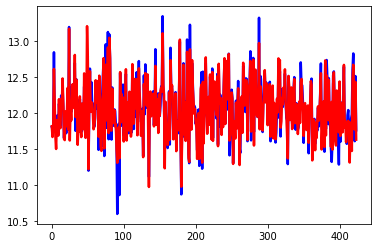

In [105]:
# plotting y_test v/s y_test_pred_ridge
ind = [i for i in range(0, y_test.shape[0], 1)]
plt.plot(ind, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(ind, y_test_pred_ridge, color='red', linewidth=2.5, linestyle='-')
plt.show()

In [106]:
ridge.intercept_

10.662071172062658

In [107]:
model_params_ridge = list(ridge.coef_.round(3))
model_params_ridge.insert(0, ridge.intercept_.round(3))
cols = X_train.columns
cols = cols.insert(0, 'Intercept')
sorted(list(zip(model_params_ridge, cols)), key=lambda x: abs(x[0]), reverse=True)

[(10.662, 'Intercept'),
 (0.43, 'GrLivArea'),
 (0.267, 'GarageCars'),
 (0.21, 'OverallQual_9'),
 (0.199, 'FullBath'),
 (0.189, 'RoofMatl_WdShngl'),
 (0.183, '2ndFlrSF'),
 (0.179, 'MSZoning_FV'),
 (-0.174, 'OverallQual_2'),
 (0.168, 'MSZoning_RL'),
 (0.161, 'LotArea'),
 (-0.159, 'Neighborhood_MeadowV'),
 (-0.153, 'OverallQual_3'),
 (0.146, 'TotalBsmtSF'),
 (0.138, 'SaleCondition_Family'),
 (0.135, 'MSZoning_RM'),
 (0.133, 'Neighborhood_StoneBr'),
 (0.13, 'GarageQual'),
 (0.124, 'Fireplaces'),
 (0.119, 'BsmtFullBath'),
 (0.119, 'WoodDeckSF'),
 (-0.119, 'OverallCond_3'),
 (0.118, 'OverallQual_8'),
 (0.118, 'OverallQual_10'),
 (-0.115, 'Exterior1st_BrkComm'),
 (0.114, 'Neighborhood_Crawfor'),
 (0.11, 'MSZoning_RH'),
 (0.108, 'CentralAir'),
 (0.105, 'Exterior1st_BrkFace'),
 (0.099, 'BsmtFinSF1'),
 (0.098, 'ScreenPorch'),
 (0.097, 'BsmtFinSF2'),
 (-0.092, 'BldgType_Twnhs'),
 (0.091, 'Neighborhood_NoRidge'),
 (0.091, 'SaleCondition_Normal'),
 (0.09, 'Exterior1st_Stone'),
 (0.086, 'HalfBath'),

In [108]:
# Put the Features and coefficienst in a dataframe and get top 10 features from the list
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(3)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df.sort_values(by='Coefficient',ascending=False).head(10)

,Features,Coefficient
18,GrLivArea,0.430
29,GarageCars,0.267
133,OverallQual_9,0.210
21,FullBath,0.199
154,RoofMatl_WdShngl,0.189
16,2ndFlrSF,0.183
58,MSZoning_FV,0.179
60,MSZoning_RL,0.168
1,LotArea,0.161
13,TotalBsmtSF,0.146


### Lasso Regression

In [109]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                    0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [110]:
lasso = Lasso()
folds = 5
model_lasso = GridSearchCV(estimator=lasso,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)

In [111]:
model_lasso.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [112]:
cv_results = pd.DataFrame(model_lasso.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.057345,0.019675,0.004977,0.001278,0.0001,{'alpha': 0.0001},-0.095498,-0.094035,-0.096462,-0.081828,-0.092254,-0.092015,0.005288,1,-0.064233,-0.065755,-0.065332,-0.070189,-0.064061,-0.065914,0.002231
1,0.012062,0.001625,0.004789,0.002508,0.001,{'alpha': 0.001},-0.086991,-0.101409,-0.099039,-0.079167,-0.094071,-0.092135,0.008149,2,-0.082588,-0.078610,-0.080445,-0.084100,-0.077608,-0.080670,0.002413
2,0.007556,0.000415,0.003076,0.000232,0.01,{'alpha': 0.01},-0.140712,-0.151441,-0.145698,-0.125062,-0.136745,-0.139931,0.008917,3,-0.138764,-0.134650,-0.135918,-0.136993,-0.130465,-0.135358,0.002794
3,0.008355,0.001810,0.003182,0.000983,0.05,{'alpha': 0.05},-0.264979,-0.263047,-0.249876,-0.229534,-0.249448,-0.251377,0.012683,4,-0.246741,-0.251596,-0.250290,-0.250461,-0.252036,-0.250225,0.001863
4,0.006550,0.000780,0.004266,0.001162,0.1,{'alpha': 0.1},-0.318188,-0.312182,-0.305116,-0.278613,-0.292805,-0.301381,0.014178,5,-0.298480,-0.300357,-0.302276,-0.303720,-0.301629,-0.301292,0.001775
5,0.006361,0.001540,0.003554,0.000388,0.2,{'alpha': 0.2},-0.318188,-0.312182,-0.305116,-0.282440,-0.295537,-0.302693,0.012628,6,-0.298480,-0.300357,-0.302276,-0.307578,-0.304765,-0.302691,0.003210
6,0.008117,0.001448,0.004870,0.000587,0.3,{'alpha': 0.3},-0.318188,-0.312182,-0.305116,-0.282440,-0.295537,-0.302693,0.012628,6,-0.298480,-0.300357,-0.302276,-0.307578,-0.304765,-0.302691,0.003210
7,0.009561,0.000964,0.005319,0.000591,0.4,{'alpha': 0.4},-0.318188,-0.312182,-0.305116,-0.282440,-0.295537,-0.302693,0.012628,6,-0.298480,-0.300357,-0.302276,-0.307578,-0.304765,-0.302691,0.003210
8,0.007225,0.000993,0.004656,0.000845,0.5,{'alpha': 0.5},-0.318188,-0.312182,-0.305116,-0.282440,-0.295537,-0.302693,0.012628,6,-0.298480,-0.300357,-0.302276,-0.307578,-0.304765,-0.302691,0.003210
9,0.009701,0.005362,0.001379,0.001754,0.6,{'alpha': 0.6},-0.318188,-0.312182,-0.305116,-0.282440,-0.295537,-0.302693,0.012628,6,-0.298480,-0.300357,-0.302276,-0.307578,-0.304765,-0.302691,0.003210


In [113]:
model_lasso.best_params_

{'alpha': 0.0001}

In [114]:
# Setting alpha as best_param_, building a lasso regression model
alpha = list(model_lasso.best_params_.values())[0]
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [115]:
# Predicting on X_train
y_train_pred_lasso = lasso.predict(X_train)

#Checking r2_score
r2_score(y_train, y_train_pred_lasso)

0.9406835048227746

In [116]:
# Predicting on X_test
y_test_pred_lasso = lasso.predict(X_test)

# Checking r2_score
r2_score(y_test, y_test_pred_lasso)

0.8572129599111196

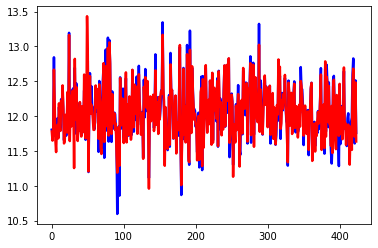

In [117]:
# plotting y_test v/s y_test_pred_lasso
ind = [i for i in range(0, y_test.shape[0], 1)]
plt.plot(ind, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(ind, y_test_pred_lasso, color='red', linewidth=2.5, linestyle='-')
plt.show()

In [118]:
lasso.intercept_

9.639368413859327

In [119]:
lasso.coef_.round(3)

array([-2.000e-03,  3.070e-01,  0.000e+00,  3.400e-02, -2.800e-02,
        6.400e-02,  3.800e-02,  5.000e-02,  5.500e-02,  4.500e-02,
       -1.900e-02,  4.200e-02, -0.000e+00,  6.300e-02,  4.100e-02,
        1.000e-01,  0.000e+00,  0.000e+00,  1.241e+00,  9.900e-02,
        3.100e-02,  1.240e-01,  5.900e-02, -0.000e+00, -1.000e-02,
        3.500e-02,  9.800e-02,  7.800e-02,  1.800e-02,  2.570e-01,
        1.910e-01, -3.200e-02,  4.000e-03,  9.900e-02,  5.500e-02,
        8.000e-03,  9.200e-02,  1.040e-01, -2.000e-02, -0.000e+00,
        5.000e-03, -6.000e-02,  2.400e-02,  1.600e-02, -7.400e-02,
        1.700e-02, -0.000e+00, -1.000e-03, -0.000e+00,  1.600e-02,
       -1.300e-02, -5.000e-03,  0.000e+00,  0.000e+00, -1.300e-02,
       -3.600e-02, -0.000e+00, -7.500e-02,  3.850e-01,  2.910e-01,
        3.340e-01,  2.890e-01,  8.300e-02,  1.000e-02, -5.000e-02,
        8.000e-03,  2.700e-02,  8.000e-03,  2.800e-02, -5.200e-02,
        3.100e-02, -1.600e-02, -2.000e-02, -1.100e-02,  5.300e

In [120]:
model_params_lasso = list(lasso.coef_.round(3))
model_params_lasso.insert(0, lasso.intercept_.round(3))
cols = X_train.columns
cols = cols.insert(0, 'Intercept')
sorted(list(zip(model_params_lasso, cols)), key=lambda x: abs(x[0]), reverse=True)

[(9.639, 'Intercept'),
 (1.241, 'GrLivArea'),
 (0.964, 'RoofMatl_WdShngl'),
 (0.862, 'RoofMatl_CompShg'),
 (0.833, 'RoofMatl_Membran'),
 (0.811, 'RoofMatl_WdShake'),
 (0.777, 'RoofMatl_Tar&Grv'),
 (0.746, 'RoofMatl_Roll'),
 (0.385, 'MSZoning_FV'),
 (0.334, 'MSZoning_RL'),
 (-0.311, 'Exterior1st_BrkComm'),
 (0.307, 'LotArea'),
 (0.291, 'MSZoning_RH'),
 (0.289, 'MSZoning_RM'),
 (0.257, 'GarageCars'),
 (0.234, 'OverallQual_9'),
 (-0.218, 'OverallQual_2'),
 (0.191, 'GarageQual'),
 (-0.167, 'OverallQual_3'),
 (0.164, 'OverallQual_10'),
 (-0.155, 'Neighborhood_MeadowV'),
 (0.148, 'SaleCondition_Family'),
 (0.133, 'OverallQual_8'),
 (0.131, 'Neighborhood_Crawfor'),
 (0.13, 'Neighborhood_StoneBr'),
 (0.124, 'FullBath'),
 (-0.12, 'OverallCond_3'),
 (0.113, 'Condition2_PosA'),
 (0.109, 'SaleType_Oth'),
 (0.104, 'ScreenPorch'),
 (-0.102, 'Foundation_Wood'),
 (0.1, 'CentralAir'),
 (0.099, 'BsmtFullBath'),
 (0.099, 'WoodDeckSF'),
 (0.098, 'Functional'),
 (-0.097, 'BldgType_Twnhs'),
 (0.094, 'Exteri

In [121]:
# Put the Features and coefficienst in a dataframe and get top 10 features from the list
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(3)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.sort_values(by='Coefficient',ascending=False).head(20)

,Features,Coefficient
18,GrLivArea,1.241
154,RoofMatl_WdShngl,0.964
148,RoofMatl_CompShg,0.862
149,RoofMatl_Membran,0.833
153,RoofMatl_WdShake,0.811
152,RoofMatl_Tar&Grv,0.777
151,RoofMatl_Roll,0.746
58,MSZoning_FV,0.385
60,MSZoning_RL,0.334
1,LotArea,0.307


### <font color = 'blue'> Final Model and Conclusion

Optimal lambda Values in model:
- Lasso alpha = 0.0001
- Ridge alpha = 2.0

In [122]:
#Checking r2_score
print(r2_score(y_train, y_train_pred_lasso).round(4))
print(r2_score(y_test, y_test_pred_lasso).round(4))

0.9407
0.8572


In [123]:
#Checking r2_score
print(r2_score(y_train, y_train_pred_ridge).round(4))
print(r2_score(y_test, y_test_pred_ridge).round(4))

0.9277
0.8613


<font color = 'blue'> We will use the output from lasso regression though the test accuracy is slightly lesser than ridge regression as it uses less number of variables, hence becoming the more simpler model as compared to ridge regression

<font color = 'blue'>Which variables are significant in predicting the price of a house

- GrLivArea: As the the ground living area sqft increases, the sale price also increases 
- RoofMatl: If the roof materials used are Wood Shingles, Standard Composite, Membrane, Wood Shakes or Gravel & Tar, the sale price increases.
- MSZoning: If the zoning classification of the sale is within Floating Village Residential, Residential Low Density, Residential High Density or Residential Medium Density the sale price increases.
- GarageCars: As the size of the garage increases, the sale price increases.
- GarageQual: If the quality of garage is excellent, the sale price increases.
- OverallQual: If the overall quality is excellent, sale price is higher 
- SaleCondition: If the sale is between family members, the sale price is higher.
- Neighborhood: If the house is in neighbourhood of Crawford, the sale price increases 


<font color = 'blue'>How well those variables describe the price of a house.
    

These varibles tells about the linear relation with respect the price by which the company can improve there sales. 
Based on the model output, the company can concentrate in invseting properties wich may have high SalePrice in future.

In [124]:
model_ridge.best_params_.values()

dict_values([2.0])

In [125]:
model_lasso.best_params_.values()

dict_values([0.0001])

In [126]:
#Problem statement || 

In [127]:
#Que 1:
#Ridge

alpha = 4.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=4.0)

In [128]:
# Predicting on X_train
y_train_pred_lasso = lasso.predict(X_train)
#Checking r2_score
print(r2_score(y_train, y_train_pred_lasso))

# Predicting on X_test
y_test_pred_lasso = lasso.predict(X_test)
# Checking r2_score
print(r2_score(y_test, y_test_pred_lasso))

0.9406835048227746
0.8572129599111196


In [129]:
model_params_ridge = list(ridge.coef_.round(3))
model_params_ridge.insert(0, ridge.intercept_.round(3))
cols = X_train.columns
cols = cols.insert(0, 'Intercept')
sorted(list(zip(model_params_ridge, cols)), key=lambda x: abs(x[0]), reverse=True)

[(10.821, 'Intercept'),
 (0.321, 'GrLivArea'),
 (0.255, 'GarageCars'),
 (0.2, 'FullBath'),
 (0.186, 'OverallQual_9'),
 (0.173, '2ndFlrSF'),
 (-0.137, 'OverallQual_3'),
 (-0.136, 'OverallQual_2'),
 (0.135, 'Fireplaces'),
 (0.134, 'RoofMatl_WdShngl'),
 (-0.131, 'Neighborhood_MeadowV'),
 (0.126, 'TotalBsmtSF'),
 (0.124, 'Neighborhood_StoneBr'),
 (0.119, 'MSZoning_FV'),
 (0.119, 'MSZoning_RL'),
 (-0.117, 'OverallCond_3'),
 (0.113, 'BsmtFullBath'),
 (0.113, 'WoodDeckSF'),
 (0.112, 'CentralAir'),
 (0.112, 'SaleCondition_Family'),
 (0.111, 'Neighborhood_Crawfor'),
 (0.109, 'LotArea'),
 (0.107, 'OverallQual_8'),
 (0.098, 'Exterior1st_BrkFace'),
 (0.097, 'OverallQual_10'),
 (0.092, 'GarageQual'),
 (0.092, 'Neighborhood_NoRidge'),
 (0.089, 'ScreenPorch'),
 (-0.089, 'BldgType_Twnhs'),
 (0.086, 'BedroomAbvGr'),
 (0.086, 'SaleCondition_Normal'),
 (0.085, 'HalfBath'),
 (0.084, 'BsmtQual'),
 (-0.083, 'OverallQual_4'),
 (0.082, 'BsmtFinSF2'),
 (0.082, 'Neighborhood_NridgHt'),
 (-0.081, 'Neighborhood_E

In [130]:
# Put the Features and coefficienst in a dataframe and get top 10 features from the list
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(3)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df.sort_values(by='Coefficient',ascending=False).head(10)

,Features,Coefficient
18,GrLivArea,0.321
29,GarageCars,0.255
21,FullBath,0.200
133,OverallQual_9,0.186
16,2ndFlrSF,0.173
27,Fireplaces,0.135
154,RoofMatl_WdShngl,0.134
13,TotalBsmtSF,0.126
97,Neighborhood_StoneBr,0.124
58,MSZoning_FV,0.119


In [131]:
#Lasso

alpha = 0.0002
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)


Lasso(alpha=0.0002)

In [132]:
# Predicting on X_train
y_train_pred_lasso = lasso.predict(X_train)
#Checking r2_score
print(r2_score(y_train, y_train_pred_lasso))

# Predicting on X_test
y_test_pred_lasso = lasso.predict(X_test)
# Checking r2_score
print(r2_score(y_test, y_test_pred_lasso))


0.9297525951672969
0.8657048777408145


In [133]:
model_params_lasso = list(lasso.coef_.round(3))
model_params_lasso.insert(0, lasso.intercept_.round(3))
cols = X_train.columns
cols = cols.insert(0, 'Intercept')
sorted(list(zip(model_params_lasso, cols)), key=lambda x: abs(x[0]), reverse=True)


[(10.633, 'Intercept'),
 (1.15, 'GrLivArea'),
 (0.296, 'MSZoning_FV'),
 (0.277, 'GarageCars'),
 (-0.253, 'OverallQual_2'),
 (0.252, 'MSZoning_RL'),
 (0.228, 'LotArea'),
 (-0.21, 'Exterior1st_BrkComm'),
 (0.208, 'MSZoning_RM'),
 (0.206, 'MSZoning_RH'),
 (0.206, 'OverallQual_9'),
 (0.196, 'RoofMatl_WdShngl'),
 (-0.184, 'OverallQual_3'),
 (0.168, 'GarageQual'),
 (0.155, 'FullBath'),
 (-0.145, 'Neighborhood_MeadowV'),
 (0.142, 'SaleCondition_Family'),
 (0.141, 'Neighborhood_Crawfor'),
 (0.134, 'Neighborhood_StoneBr'),
 (-0.117, 'BldgType_Twnhs'),
 (-0.117, 'OverallCond_3'),
 (-0.111, 'PoolArea'),
 (0.109, 'CentralAir'),
 (0.109, 'OverallQual_8'),
 (0.102, 'Neighborhood_NridgHt'),
 (0.1, 'WoodDeckSF'),
 (0.099, 'BsmtFullBath'),
 (0.099, 'ScreenPorch'),
 (-0.099, 'Exterior2nd_Stucco'),
 (0.089, 'Neighborhood_NoRidge'),
 (0.089, 'Exterior1st_BrkFace'),
 (-0.088, 'BldgType_TwnhsE'),
 (0.088, 'Heating_GasW'),
 (0.087, 'Fireplaces'),
 (-0.086, 'OverallQual_4'),
 (0.082, 'Functional'),
 (-0.082, 

In [134]:
# Put the Features and coefficienst in a dataframe and get top 10 features from the list
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(3)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.sort_values(by='Coefficient',ascending=False).head(10)

,Features,Coefficient
18,GrLivArea,1.150
58,MSZoning_FV,0.296
29,GarageCars,0.277
60,MSZoning_RL,0.252
1,LotArea,0.228
61,MSZoning_RM,0.208
59,MSZoning_RH,0.206
133,OverallQual_9,0.206
154,RoofMatl_WdShngl,0.196
30,GarageQual,0.168


#### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

#### 5 most important variables in lasso model with alpha 0.0001 are 
- GrLivArea	        (coeff: 1.241)
- RoofMatl_WdShngl	(coeff: 0.964)
- RoofMatl_CompShg	(coeff: 0.862)
- RoofMatl_Membran	(coeff: 0.833)
- RoofMatl_WdShake	(coeff: 0.811)

In [135]:
#Make of copy of the final dataframe:
house_lasso = house_final.copy()

#drop above mentioned columns from the dataframe:
house_lasso = house_lasso.drop(['GrLivArea','RoofMatl_WdShngl','RoofMatl_CompShg','RoofMatl_Membran','RoofMatl_WdShake'],axis=1)

#Split the data into train/test
df_train, df_test = train_test_split(house_lasso, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(986, 211)
(424, 211)


In [136]:
y_train = df_train.pop('SalePrice')
X_train = df_train

print(X_train.shape)

y_test = df_test.pop('SalePrice')
X_test = df_test

print(X_test.shape)

(986, 210)
(424, 210)


In [137]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                    0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


In [138]:
lasso = Lasso()
folds = 5
model_lasso = GridSearchCV(estimator=lasso,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)

In [139]:
model_lasso.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [140]:
cv_results = pd.DataFrame(model_lasso.cv_results_)
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.075327,0.018314,0.003131,0.006262,0.0001,{'alpha': 0.0001},-0.096643,-0.103021,-0.108891,-0.093332,-0.096182,-0.099614,0.005617,2,-0.073466,-0.073253,-0.072427,-0.075510,-0.066781,-0.072287,0.002934
1,0.015903,0.000395,0.000000,0.000000,0.001,{'alpha': 0.001},-0.085144,-0.110794,-0.101458,-0.095847,-0.103736,-0.099396,0.008587,1,-0.085120,-0.080855,-0.083663,-0.084647,-0.077461,-0.082349,0.002857
2,0.015504,0.000248,0.004530,0.006178,0.01,{'alpha': 0.01},-0.099299,-0.123518,-0.119528,-0.125743,-0.125217,-0.118661,0.009923,3,-0.114658,-0.109683,-0.110109,-0.111676,-0.105843,-0.110394,0.002868
3,0.023672,0.007003,0.008849,0.007288,0.05,{'alpha': 0.05},-0.126052,-0.144160,-0.142925,-0.153822,-0.154053,-0.144202,0.010204,4,-0.141032,-0.139211,-0.140355,-0.138559,-0.128731,-0.137578,0.004506
4,0.027004,0.005291,0.005625,0.006960,0.1,{'alpha': 0.1},-0.132379,-0.149004,-0.146241,-0.156107,-0.153907,-0.147528,0.008338,10,-0.147272,-0.144438,-0.144159,-0.142626,-0.128675,-0.141434,0.006554
5,0.018717,0.006261,0.003125,0.006250,0.2,{'alpha': 0.2},-0.132607,-0.149408,-0.144946,-0.155543,-0.153783,-0.147258,0.008196,8,-0.147131,-0.144132,-0.144459,-0.142835,-0.128833,-0.141478,0.006475
6,0.016403,0.001374,0.000000,0.000000,0.3,{'alpha': 0.3},-0.132894,-0.149903,-0.143966,-0.154950,-0.153840,-0.147111,0.008082,5,-0.147220,-0.144086,-0.145097,-0.143157,-0.129171,-0.141746,0.006431
7,0.018822,0.006459,0.006251,0.007656,0.4,{'alpha': 0.4},-0.133199,-0.150505,-0.144178,-0.153605,-0.154167,-0.147131,0.007818,6,-0.147738,-0.144211,-0.145875,-0.143364,-0.129628,-0.142163,0.006444
8,0.012577,0.006291,0.009374,0.007653,0.5,{'alpha': 0.5},-0.133335,-0.151269,-0.144749,-0.152241,-0.154627,-0.147244,0.007686,7,-0.148054,-0.144369,-0.146656,-0.143725,-0.130381,-0.142637,0.006323
9,0.009373,0.007653,0.006329,0.007752,0.6,{'alpha': 0.6},-0.133728,-0.152002,-0.145608,-0.150956,-0.155164,-0.147492,0.007539,9,-0.148461,-0.144540,-0.146975,-0.144135,-0.131619,-0.143146,0.005978


In [141]:
model_lasso.best_params_


{'alpha': 0.001}

In [142]:
# Setting alpha as best_param_, building a lasso regression model
alpha = list(model_lasso.best_params_.values())[0]
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [143]:
# Predicting on X_train
y_train_pred_lasso = lasso.predict(X_train)

#Checking r2_score
r2_score(y_train, y_train_pred_lasso)


0.901036275007348

In [144]:
# Predicting on X_test
y_test_pred_lasso = lasso.predict(X_test)

# Checking r2_score
r2_score(y_test, y_test_pred_lasso)


0.8608353039723415

In [145]:
model_params_lasso = list(lasso.coef_.round(3))
model_params_lasso.insert(0, lasso.intercept_.round(3))
cols = X_train.columns
cols = cols.insert(0, 'Intercept')
sorted(list(zip(model_params_lasso, cols)), key=lambda x: abs(x[0]), reverse=True)


[(10.415, 'Intercept'),
 (0.141, 'OverallQual_9'),
 (0.136, 'Neighborhood_Crawfor'),
 (-0.125, 'OverallCond_3'),
 (0.11, 'CentralAir'),
 (-0.101, 'OverallQual_3'),
 (0.099, 'OverallQual_8'),
 (0.089, 'MSZoning_FV'),
 (0.088, 'GarageCars'),
 (0.076, 'Exterior1st_BrkFace'),
 (-0.068, 'BldgType_Twnhs'),
 (0.064, 'Neighborhood_StoneBr'),
 (0.063, 'MSZoning_RL'),
 (-0.063, 'BldgType_TwnhsE'),
 (0.06, 'FullBath'),
 (-0.06, 'OverallQual_4'),
 (-0.058, 'MSSubClass_30'),
 (0.054, 'GarageQual'),
 (0.053, 'OverallCond_7'),
 (0.05, 'Neighborhood_NridgHt'),
 (0.049, 'SaleCondition_Normal'),
 (0.048, 'Neighborhood_BrkSide'),
 (0.047, 'Fireplaces'),
 (-0.04, 'HouseStyle_2Story'),
 (0.039, 'ExterQual'),
 (-0.039, 'Exterior2nd_Stucco'),
 (0.038, 'OverallQual_7'),
 (-0.034, 'Neighborhood_Edwards'),
 (0.034, 'HouseStyle_1Story'),
 (0.033, 'KitchenQual'),
 (-0.033, 'MSSubClass_160'),
 (0.033, 'SaleType_New'),
 (-0.031, 'SaleType_WD'),
 (0.03, 'BsmtQual'),
 (0.03, 'HalfBath'),
 (-0.03, 'Neighborhood_Meadow

In [146]:
# Put the Features and coefficienst in a dataframe and get top 10 features from the list
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(3)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.sort_values(by='Coefficient',ascending=False).head(10)


,Features,Coefficient
132,OverallQual_9,0.141
80,Neighborhood_Crawfor,0.136
15,CentralAir,0.110
131,OverallQual_8,0.099
57,MSZoning_FV,0.089
28,GarageCars,0.088
151,Exterior1st_BrkFace,0.076
96,Neighborhood_StoneBr,0.064
59,MSZoning_RL,0.063
20,FullBath,0.060
